In [1]:
###########################################################################

# CODE SUMMARY

Topic: **Systematic Approach in Detecting Panic Disorder Using Machine Learning**<br>
Name: **Okwuchi Anyanwu**<br>
Student No: **202250228**<br>
Supervisor: **Lana Blythe**<br>

**Models**<br>
1. **Model_1a:** First Sets of Models without Balancing the Data Set and all the Features.
2. **Model_1b:** With Feature Selection of 12 Best Scoring Features From KBest.
3. **Model_2a:** Balancing the Dataset and Using all the Features
4. **Moldel_2b:** With Balance Dataset and Applying 12 Best Features 
5. **Moldel_3:** Applying Esemble Method for the Third Model 

**Algorithms Used:**<br>
1.Decision Tree <br> 
2.Random Forest<br>
3.Support Vector Machine<br> 
4.K-Nearest Neighbours<br>
5.Gaussian Naive Bayes<br> 
6.Logistics Regressor

**Dataset**: Ayesha Clinic, (Panic Disorder Detection Dataset, 2023) sourced from Kaggle. 

# IMPORT ALL NECESSARY LIBRAIES

In [1]:
# Generial libraris
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# from ydata_profiling import ProfileReport
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Importing libraries for appriori analysis/EDA
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest, f_classif
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

# Preprocessign and Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Modeling (Classification)
from numpy import mean, std
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, matthews_corrcoef
from sklearn.metrics import balanced_accuracy_score

# Explainability
import shap

## Reading in Trainning and Testing Data Set Seperately

### Trainning Dataset

In [2]:
panic_training_df = pd.read_csv("D:/Panic Disorder Data Set/Final Code Copy/panic_disorder_dataset_training.csv")
panic_training_df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,NaN,NaN,Socializing,Low,Diet,0
99996,99997,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,NaN,Meditation,High,Diet,0
99997,99998,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Seeking therapy,Low,Exercise,0
99998,99999,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [3]:
# checking the information of the dataset
panic_training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Participant ID            100000 non-null  int64 
 1   Age                       100000 non-null  int64 
 2   Gender                    100000 non-null  object
 3   Family History            100000 non-null  object
 4   Personal History          100000 non-null  object
 5   Current Stressors         100000 non-null  object
 6   Symptoms                  100000 non-null  object
 7   Severity                  100000 non-null  object
 8   Impact on Life            100000 non-null  object
 9   Demographics              100000 non-null  object
 10  Medical History           74827 non-null   object
 11  Psychiatric History       75079 non-null   object
 12  Substance Use             66626 non-null   object
 13  Coping Mechanisms         100000 non-null  object
 14  Socia

In [4]:
# checking for missing values
panic_training_df.isna().sum()

Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             25173
Psychiatric History         24921
Substance Use               33374
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

### Testing Dataset

In [5]:
panic_testing_df = pd.read_csv("D:/Panic Disorder Data Set/Final Code Copy/panic_disorder_dataset_testing.csv")
panic_testing_df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,41,Male,Yes,No,High,Shortness of breath,Mild,Mild,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
1,2,20,Female,Yes,No,Low,Shortness of breath,Mild,Significant,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Diet,0
2,3,32,Male,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Heart disease,Bipolar disorder,Drugs,Meditation,Moderate,Exercise,0
3,4,41,Female,Yes,Yes,Moderate,Shortness of breath,Moderate,Significant,Urban,Heart disease,Anxiety disorder,NaN,Exercise,High,Sleep quality,0
4,5,36,Female,Yes,No,High,Chest pain,Severe,Significant,Rural,Asthma,Depressive disorder,NaN,Seeking therapy,Low,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Exercise,Moderate,Sleep quality,0
19996,19997,27,Male,No,Yes,High,Panic attacks,Mild,Moderate,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
19997,19998,21,Female,No,No,Low,Dizziness,Moderate,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,Moderate,Diet,0
19998,19999,28,Male,No,Yes,Moderate,Dizziness,Mild,Significant,Rural,Heart disease,Anxiety disorder,NaN,Meditation,Moderate,Sleep quality,0


In [6]:
# checking the information of the dataset
panic_testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Participant ID            20000 non-null  int64 
 1   Age                       20000 non-null  int64 
 2   Gender                    20000 non-null  object
 3   Family History            20000 non-null  object
 4   Personal History          20000 non-null  object
 5   Current Stressors         20000 non-null  object
 6   Symptoms                  20000 non-null  object
 7   Severity                  20000 non-null  object
 8   Impact on Life            20000 non-null  object
 9   Demographics              20000 non-null  object
 10  Medical History           14999 non-null  object
 11  Psychiatric History       15011 non-null  object
 12  Substance Use             13383 non-null  object
 13  Coping Mechanisms         20000 non-null  object
 14  Social Support        

In [7]:
# checking for missing values
panic_testing_df.isna().sum()

Participant ID                 0
Age                            0
Gender                         0
Family History                 0
Personal History               0
Current Stressors              0
Symptoms                       0
Severity                       0
Impact on Life                 0
Demographics                   0
Medical History             5001
Psychiatric History         4989
Substance Use               6617
Coping Mechanisms              0
Social Support                 0
Lifestyle Factors              0
Panic Disorder Diagnosis       0
dtype: int64

# COMBINE THE TRAINING AND THE TESTING DATA SET

In [8]:
def merge_csvs_with_pandas(file1, file2, output_file):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    merged_df = pd.concat([df1, df2], ignore_index=True)
    merged_df.to_csv(output_file, index=False)


merge_csvs_with_pandas('panic_disorder_dataset_training.csv', 'panic_disorder_dataset_testing.csv', 'panic_disorder_dataset.csv')

In [9]:
panic_df = pd.read_csv('panic_disorder_dataset.csv')
panic_df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Exercise,Moderate,Sleep quality,0
119996,19997,27,Male,No,Yes,High,Panic attacks,Mild,Moderate,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
119997,19998,21,Female,No,No,Low,Dizziness,Moderate,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,Moderate,Diet,0
119998,19999,28,Male,No,Yes,Moderate,Dizziness,Mild,Significant,Rural,Heart disease,Anxiety disorder,NaN,Meditation,Moderate,Sleep quality,0


In [10]:
# checking for duplicated rows
panic_df.duplicated().sum()

0

In [11]:
# checking for missing entries
panic_df.isna().sum()

Participant ID                  0
Age                             0
Gender                          0
Family History                  0
Personal History                0
Current Stressors               0
Symptoms                        0
Severity                        0
Impact on Life                  0
Demographics                    0
Medical History             30174
Psychiatric History         29910
Substance Use               39991
Coping Mechanisms               0
Social Support                  0
Lifestyle Factors               0
Panic Disorder Diagnosis        0
dtype: int64

### Checking for the Feature, Data Type, NaN Values, Percentage Missing, Unique Entries

In [12]:
def columns_summary():
    
    # Empty lists for each categories
    col_list = panic_df.columns.to_list()
    dtype_list = []
    null_list = []
    unique_list = []
    percentage_missing_list = []  # List to store percentage of missing values
    
    for col in panic_df.columns:
        dtype_list.append(panic_df[col].dtype)
        null_count = panic_df[col].isna().sum()
        null_list.append(null_count)
        unique_list.append(panic_df[col].nunique())
        
        # Calculate percentage of missing values
        percentage_missing = (null_count / len(panic_df)) * 100
        percentage_missing_list.append(percentage_missing)
    
    # Stack lists into dataframe
    df_sum = pd.DataFrame(list(zip(col_list, dtype_list, null_list, unique_list, percentage_missing_list)),
                          columns=['Feature', 'Data type', 'NaN values', 'Unique values', 'Percentage Missing'])
    
    return df_sum.style.hide(axis='index').format({'Percentage Missing': '{:.2f}%'})

columns_summary()

Feature,Data type,NaN values,Unique values,Percentage Missing
Participant ID,int64,0,100000,0.00%
Age,int64,0,48,0.00%
Gender,object,0,2,0.00%
Family History,object,0,2,0.00%
Personal History,object,0,2,0.00%
Current Stressors,object,0,3,0.00%
Symptoms,object,0,5,0.00%
Severity,object,0,3,0.00%
Impact on Life,object,0,3,0.00%
Demographics,object,0,2,0.00%


### Brief Data exploration Using sweetviz

                                             |                                             | [  0%]   00:00 ->…

Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.



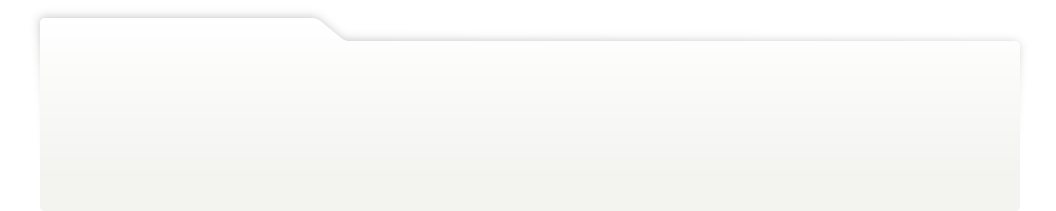
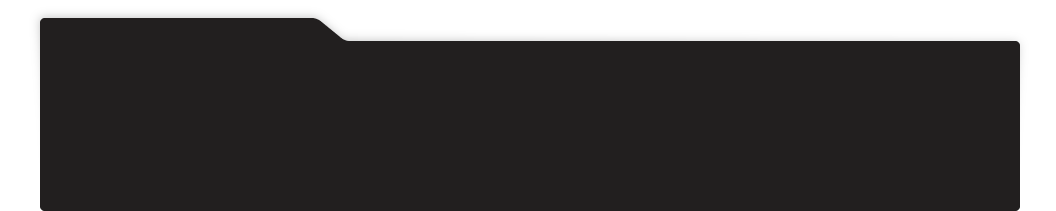
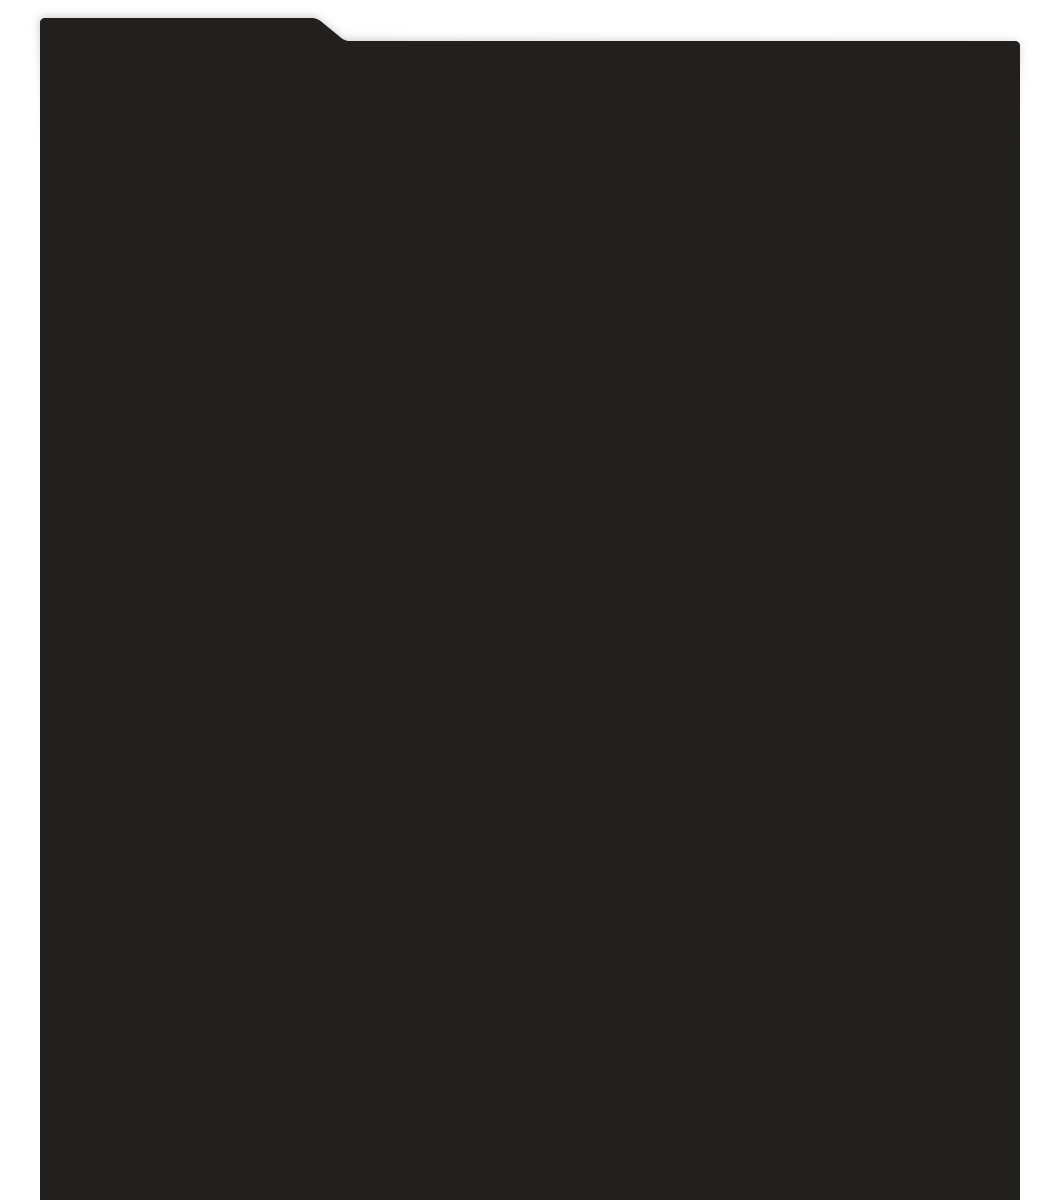
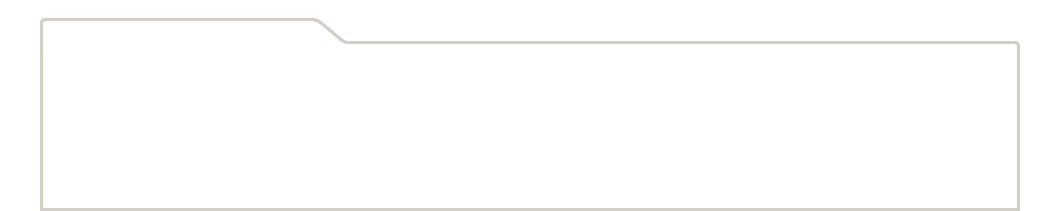
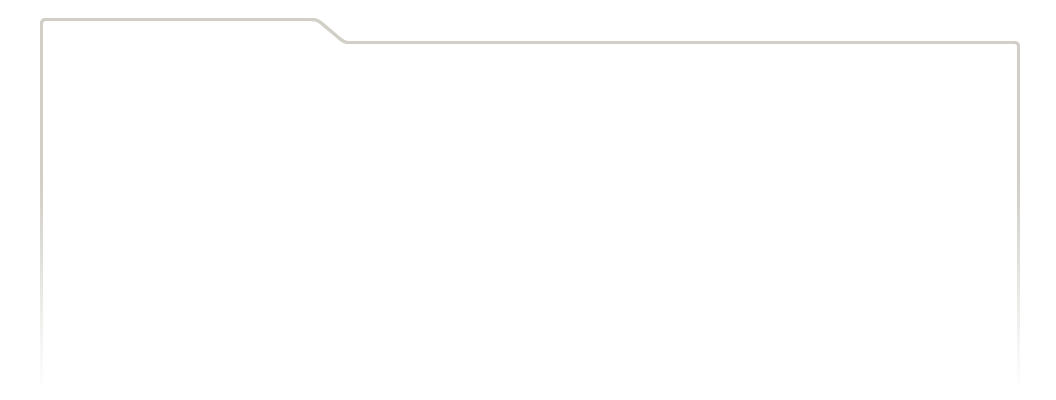
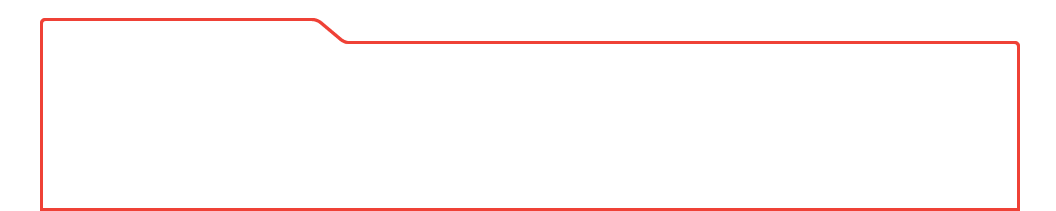
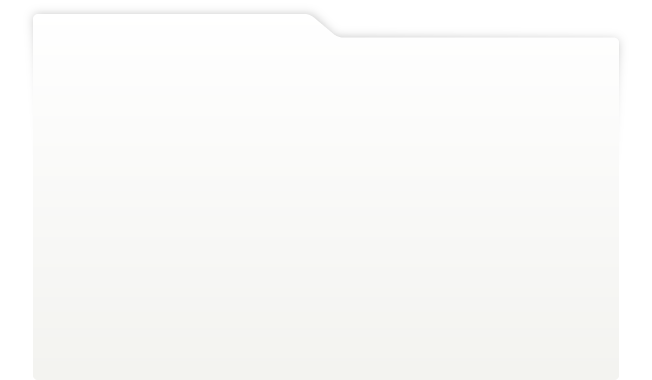
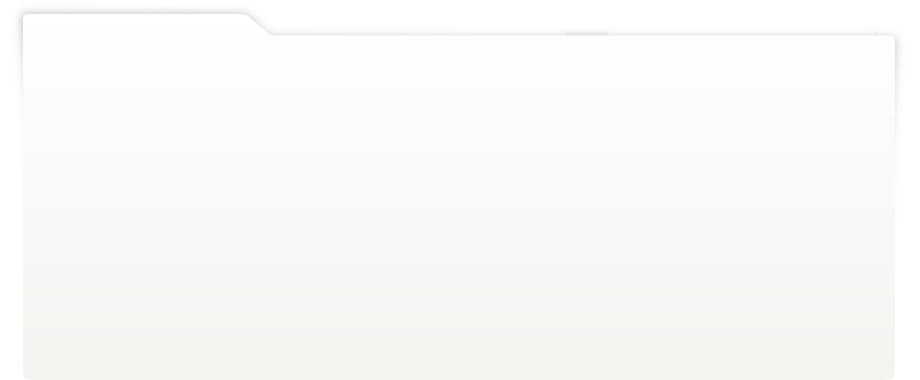
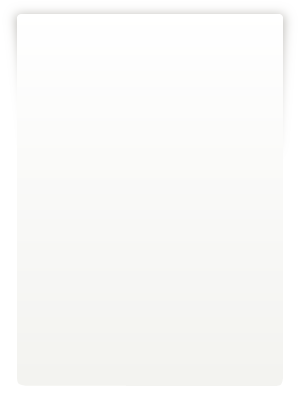
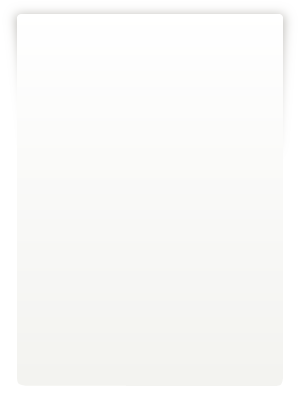
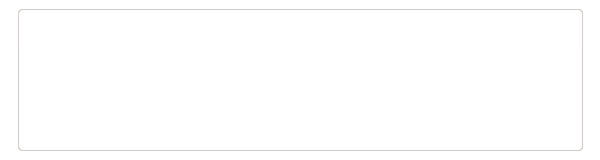
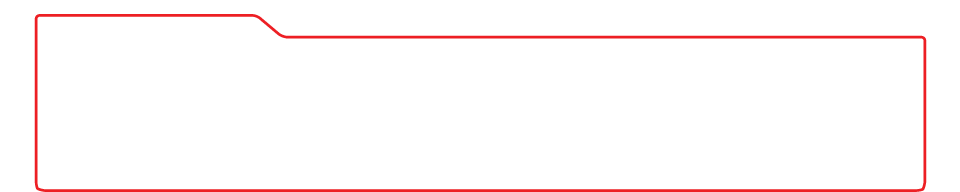
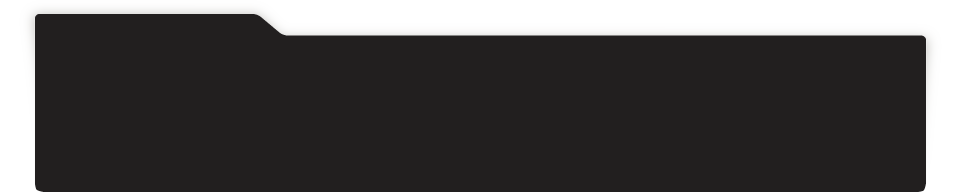
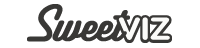
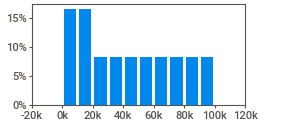
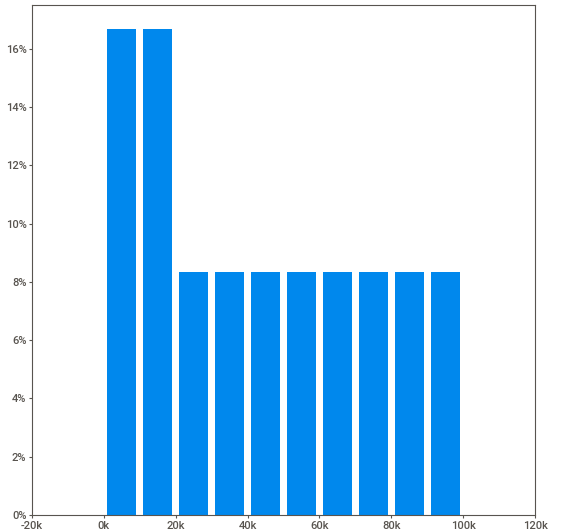
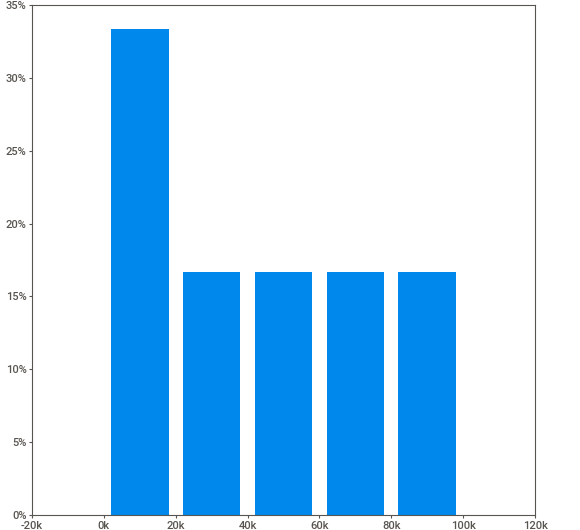
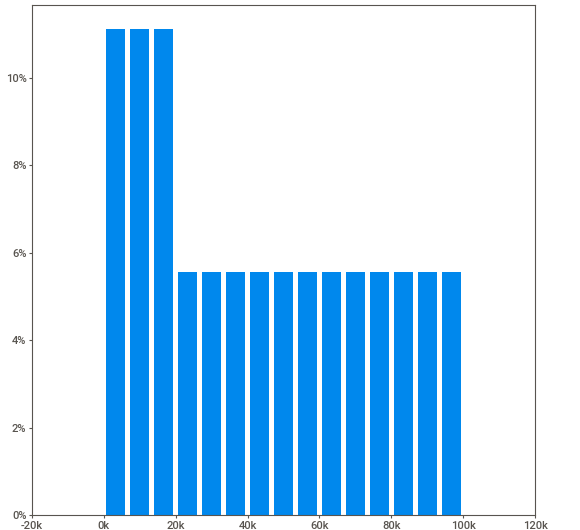
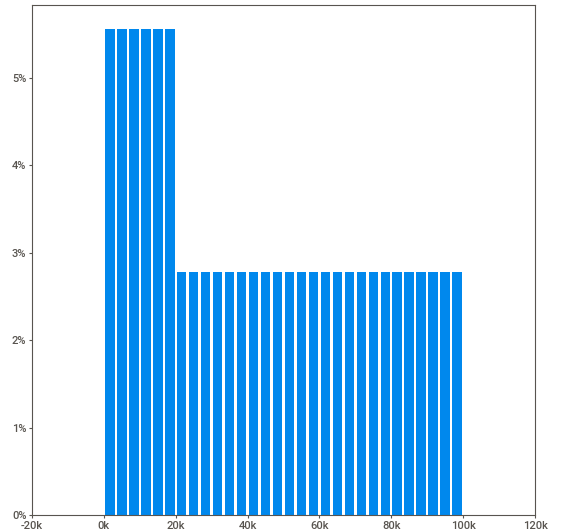
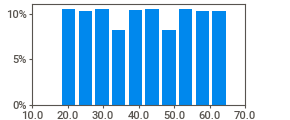
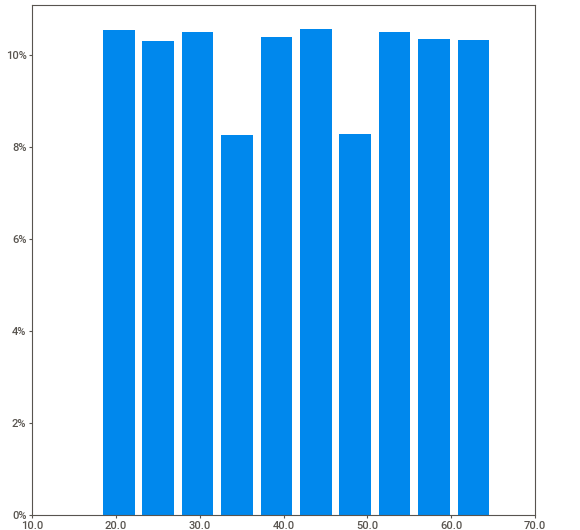
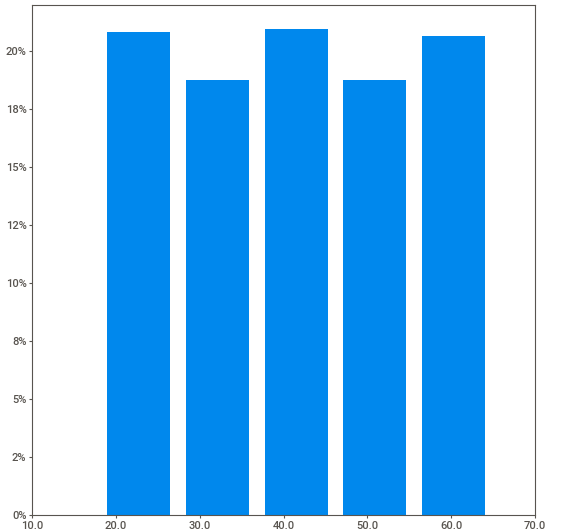
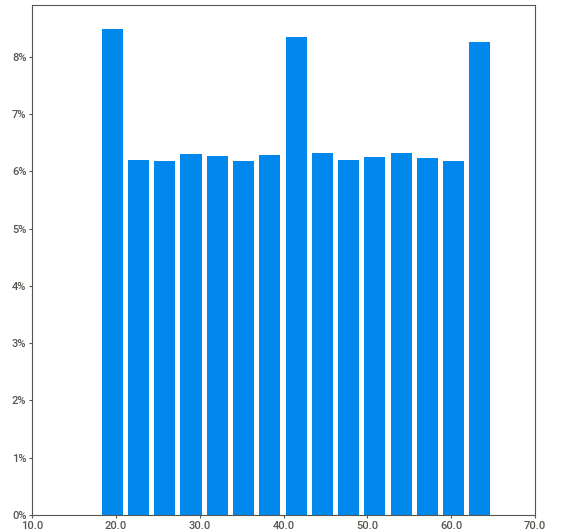
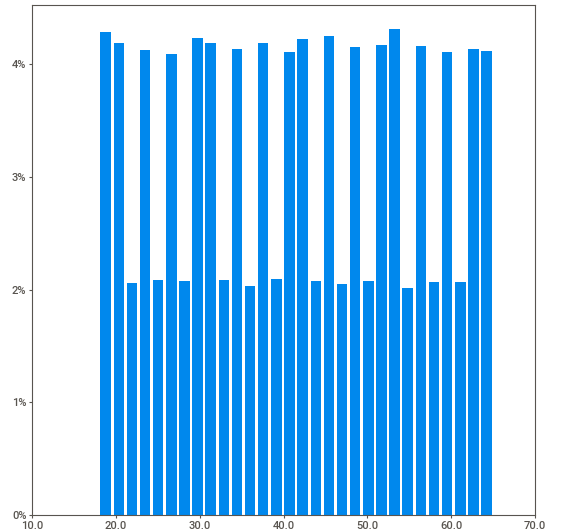
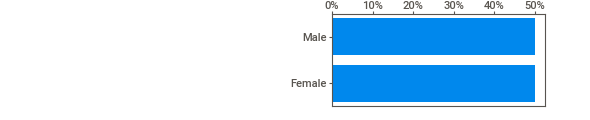
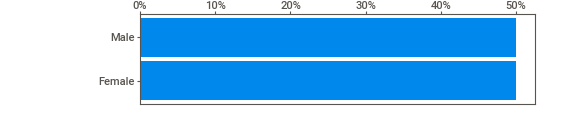
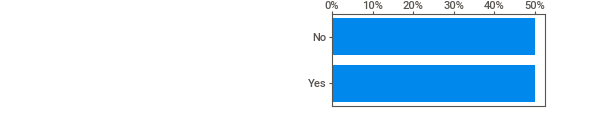
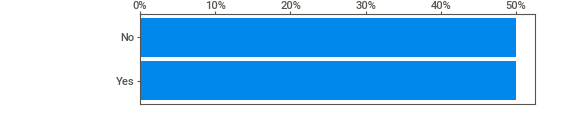
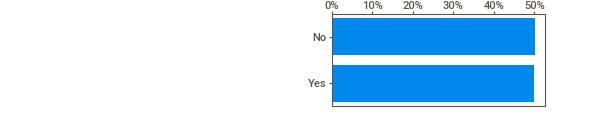
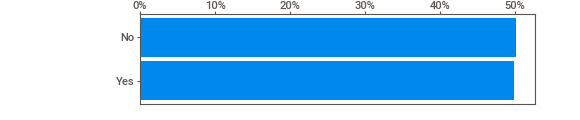
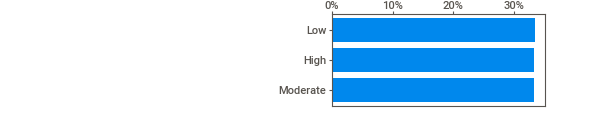
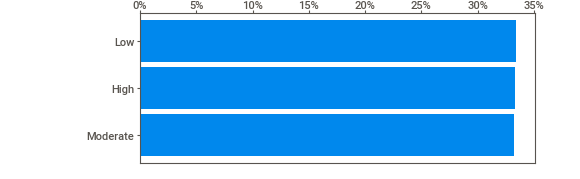
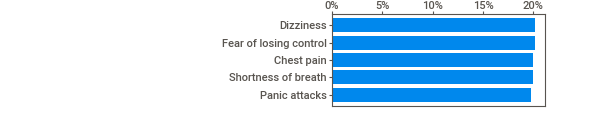
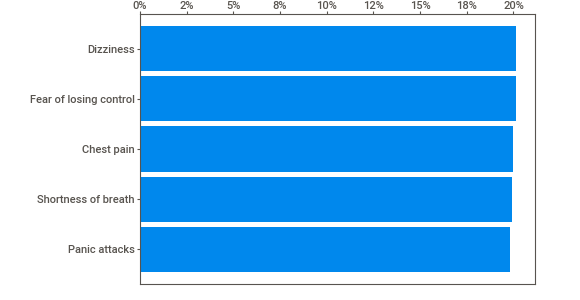
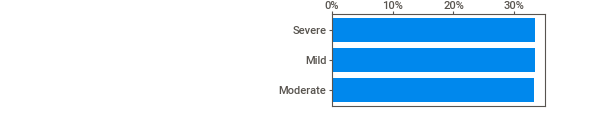
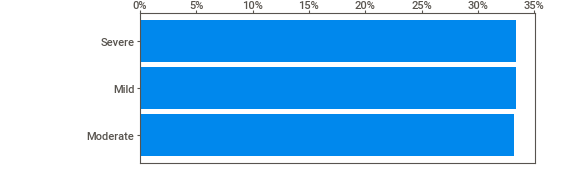
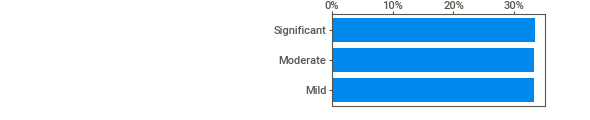
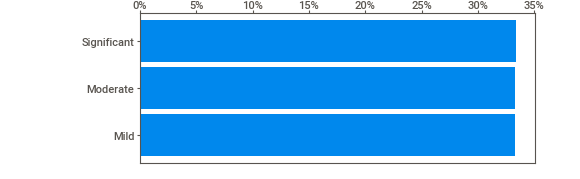
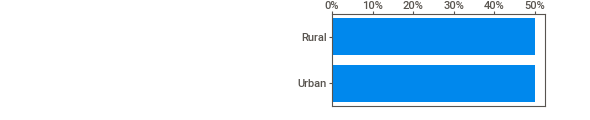
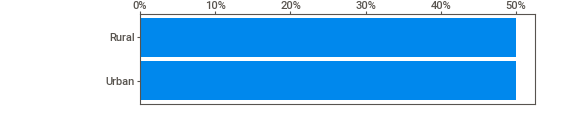
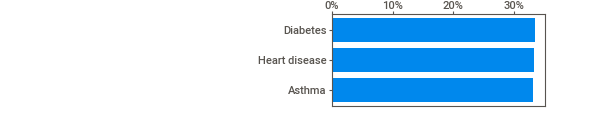
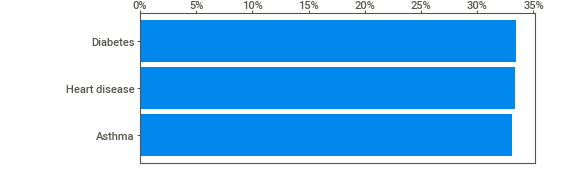
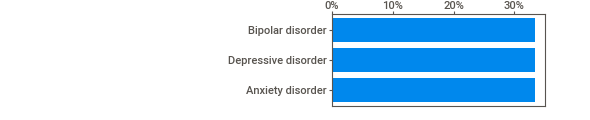
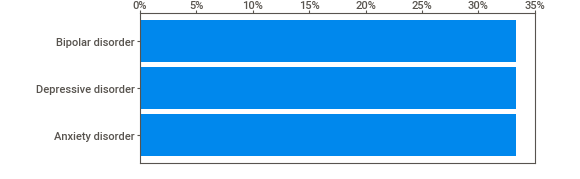
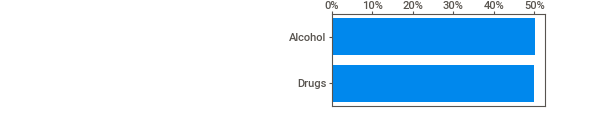
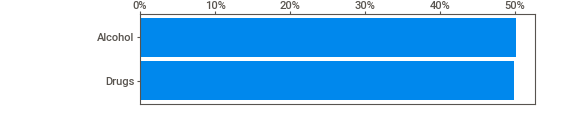
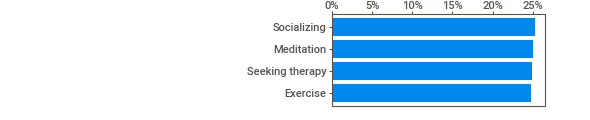
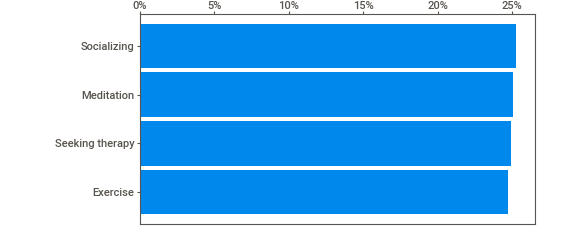
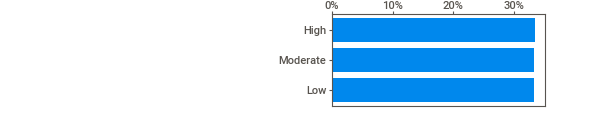
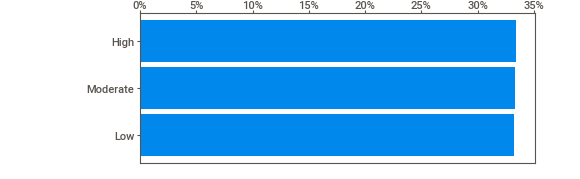
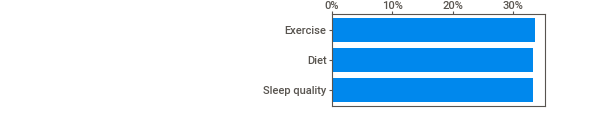
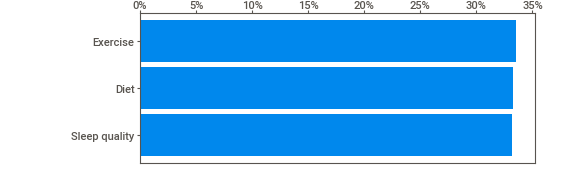
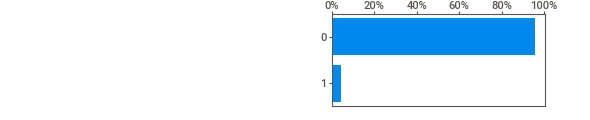
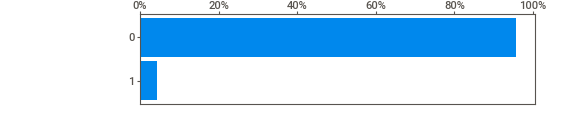
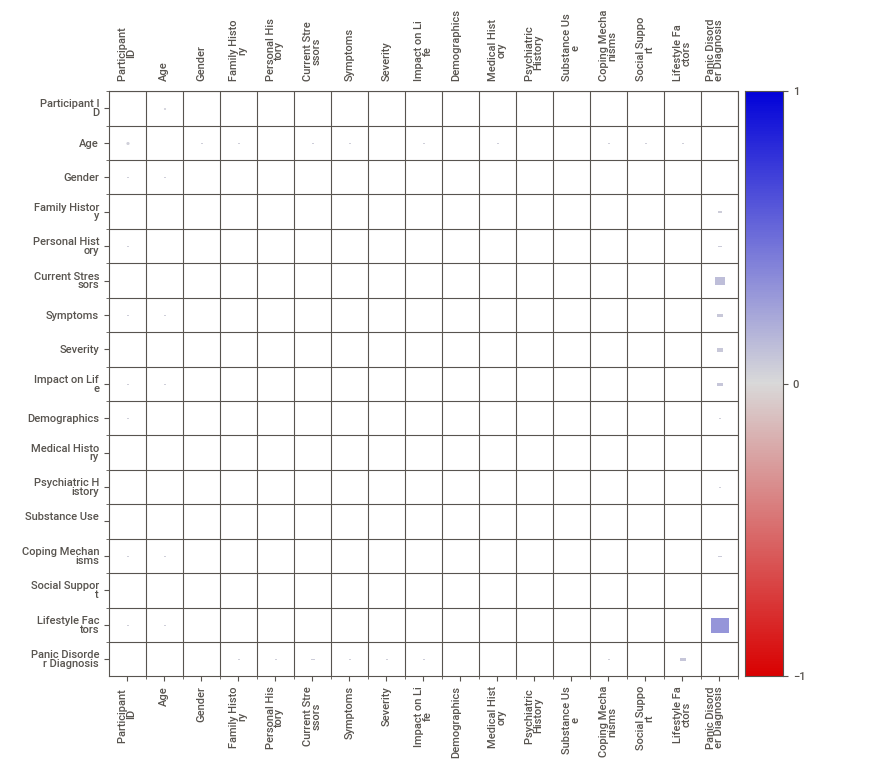
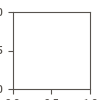

In [13]:
panic_df_profile = sv.analyze(panic_df)



panic_df_profile.show_notebook()

### Checking for Rows with Reapeated  Participant ID 

In [14]:
duplicate_rows = panic_df[panic_df['Participant ID'].duplicated(keep=False)]
duplicate_rows

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Exercise,Moderate,Sleep quality,0
119996,19997,27,Male,No,Yes,High,Panic attacks,Mild,Moderate,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
119997,19998,21,Female,No,No,Low,Dizziness,Moderate,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,Moderate,Diet,0
119998,19999,28,Male,No,Yes,Moderate,Dizziness,Mild,Significant,Rural,Heart disease,Anxiety disorder,NaN,Meditation,Moderate,Sleep quality,0


# DATA CLEANING CLEANING

1) Checking for the total rows with missing entires and the percentage of all missing entries in the data set
2) Replace the with a new Category

In [15]:
panic_df.loc[panic_df.isna().any(axis=1)]

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,NaN,Socializing,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,NaN,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,NaN,NaN,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
5,6,38,Male,Yes,Yes,Moderate,Dizziness,Moderate,Significant,Urban,NaN,Bipolar disorder,Alcohol,Seeking therapy,Moderate,Exercise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119992,19993,38,Female,Yes,No,Moderate,Dizziness,Moderate,Significant,Rural,Heart disease,NaN,Drugs,Socializing,High,Diet,0
119993,19994,62,Male,Yes,No,Low,Fear of losing control,Mild,Significant,Urban,NaN,NaN,Drugs,Seeking therapy,Low,Sleep quality,0
119994,19995,27,Male,Yes,Yes,Moderate,Dizziness,Mild,Moderate,Urban,NaN,Anxiety disorder,Drugs,Seeking therapy,High,Diet,0
119995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,NaN,Exercise,Moderate,Sleep quality,0


In [16]:
total_rows_with_na = panic_df[panic_df.isna().any(axis=1)].shape[0]
total_rows_with_na

74997

### Percentage of total missing Entries and Correct Entries

In [17]:
# Checking the percentage of missng entries in the data set

total_rows = panic_df.shape[0]  # Total number of cells in the DataFrame
na_rows = panic_df[panic_df.isna().any(axis=1)].shape[0]  # Total number of NaN cells in the DataFrame

percentage_na = (na_rows / total_rows) * 100

print('Percentage Toatl of missing values:', percentage_na,'%')

Percentage Toatl of missing values: 62.497499999999995 %


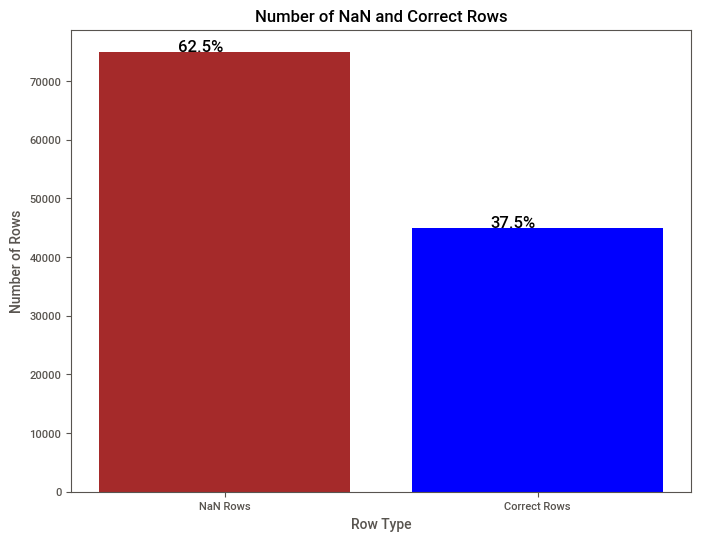

In [18]:
# Calculate the number of rows with non-NaN entries
non_na_rows = total_rows - na_rows

# Calculate the percentage of NaN and non-NaN rows
percentage_na = (na_rows / total_rows) * 100
percentage_non_na = (non_na_rows / total_rows) * 100

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['NaN Rows', 'Correct Rows'], [na_rows, non_na_rows], color=['brown', 'blue'] )
plt.xlabel('Row Type')
plt.ylabel('Number of Rows')

# Add percentage labels on the bars
for bar, percentage in zip(bars, [percentage_na, percentage_non_na]):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5, f'{percentage:.1f}%', fontsize=12)

plt.title('Number of NaN and Correct Rows')
plt.show()

### Since the total number of missing entries is more than 40% of the entire data set, is best to loginally fill it than to just drop itas this might affect the analysis

## Replacing the Missing Entries (NaN values)

Replacing the missing entries in the three columns (Medical History, Psychiatric History, Substance Use) with a new category (Not Applicable) this is considered are situation where the person neither has a medical history (disease), Psychiatric history (ie any for of psychiatric disease) and the also do not use any substance  (i.e drug or alcohol) 

In [19]:
def replace_nan_with_not_applicable(df):
    return df.fillna('Not Applicable')

In [20]:
panic_df_cleaned = replace_nan_with_not_applicable(panic_df)
panic_df_cleaned

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Not Applicable,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Not Applicable,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,Not Applicable,Not Applicable,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,Not Applicable,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,Not Applicable,Exercise,Moderate,Sleep quality,0
119996,19997,27,Male,No,Yes,High,Panic attacks,Mild,Moderate,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
119997,19998,21,Female,No,No,Low,Dizziness,Moderate,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,Moderate,Diet,0
119998,19999,28,Male,No,Yes,Moderate,Dizziness,Mild,Significant,Rural,Heart disease,Anxiety disorder,Not Applicable,Meditation,Moderate,Sleep quality,0


# EXPLORATORY DATA ANALYSIS
1) Totoal number of participant diagnoised with panic disorder and those without panic disoder
2) Exploring the relationship between the Numerical variable(Age) and the Categorical variables (Gender, Family History, Personal History, Current Stressors, Symptoms, Severity, Impact on Life,	Demographics, Medical History, Psychiatric History, Substance Use, Coping Mechanisms, Social Support, Lifestyle Factors) to the target variable (Panic disorder)

## Checking the Participants with Panic Disorder
### Panic disorder = 1
### No panic disorder = 0

In [21]:
panic_df_cleaned[panic_df_cleaned["Panic Disorder Diagnosis"] == 1]

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
47,48,59,Male,No,Yes,High,Shortness of breath,Moderate,Significant,Urban,Diabetes,Depressive disorder,Not Applicable,Seeking therapy,Low,Sleep quality,1
107,108,41,Male,No,Yes,Moderate,Panic attacks,Moderate,Significant,Rural,Asthma,Bipolar disorder,Not Applicable,Socializing,Moderate,Sleep quality,1
109,110,31,Female,Yes,No,High,Dizziness,Moderate,Significant,Urban,Heart disease,Anxiety disorder,Alcohol,Meditation,Low,Sleep quality,1
110,111,19,Male,No,Yes,Moderate,Panic attacks,Severe,Significant,Urban,Asthma,Depressive disorder,Not Applicable,Exercise,Low,Sleep quality,1
117,118,65,Female,No,Yes,High,Dizziness,Mild,Significant,Rural,Diabetes,Depressive disorder,Alcohol,Seeking therapy,High,Sleep quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119885,19886,27,Male,Yes,No,Low,Panic attacks,Severe,Mild,Rural,Not Applicable,Depressive disorder,Drugs,Seeking therapy,Low,Sleep quality,1
119943,19944,40,Female,No,Yes,High,Panic attacks,Moderate,Significant,Urban,Asthma,Anxiety disorder,Drugs,Meditation,Low,Sleep quality,1
119983,19984,65,Male,No,Yes,High,Shortness of breath,Moderate,Significant,Rural,Not Applicable,Anxiety disorder,Not Applicable,Seeking therapy,High,Sleep quality,1
119986,19987,19,Male,Yes,No,High,Chest pain,Severe,Significant,Rural,Heart disease,Depressive disorder,Not Applicable,Seeking therapy,Moderate,Sleep quality,1


In [22]:
panic_df_cleaned[panic_df_cleaned["Panic Disorder Diagnosis"] == 0]

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,1,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Not Applicable,Socializing,High,Sleep quality,0
1,2,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,3,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Not Applicable,Seeking therapy,Moderate,Exercise,0
3,4,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,Not Applicable,Not Applicable,Meditation,High,Exercise,0
4,5,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,Not Applicable,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119994,19995,27,Male,Yes,Yes,Moderate,Dizziness,Mild,Moderate,Urban,Not Applicable,Anxiety disorder,Drugs,Seeking therapy,High,Diet,0
119995,19996,31,Female,Yes,Yes,High,Chest pain,Moderate,Moderate,Rural,Heart disease,Bipolar disorder,Not Applicable,Exercise,Moderate,Sleep quality,0
119996,19997,27,Male,No,Yes,High,Panic attacks,Mild,Moderate,Rural,Asthma,Bipolar disorder,Alcohol,Exercise,High,Diet,0
119997,19998,21,Female,No,No,Low,Dizziness,Moderate,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,Moderate,Diet,0


### Distribution of the Panic Disorder Diagnosis (Target Vairable)

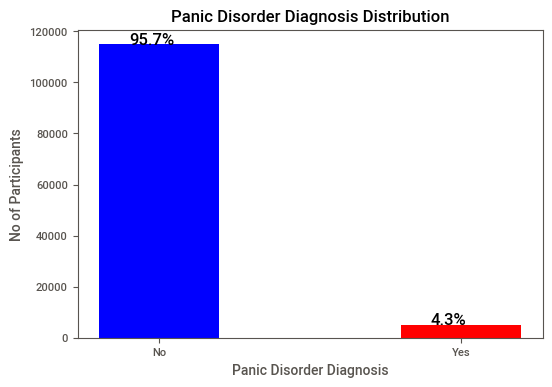

In [23]:
def count_target():
    values = panic_df_cleaned['Panic Disorder Diagnosis'].value_counts().tolist()
    total = sum(values)
    percentages = [(count / total) * 100 for count in values]
    
    plt.figure(figsize=(6, 4))
    colors = ['blue', 'red']
    bars = plt.bar(x=['No', 'Yes'], height=values, width=0.4, color=colors)
    plt.title('Panic Disorder Diagnosis Distribution')
    plt.xlabel('Panic Disorder Diagnosis')
    plt.ylabel('No of Participants')
    
    # Add percentage labels on the bars
    for bar, percentage in zip(bars, percentages):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 5, f'{percentage:.1f}%', fontsize=12)
        

    plt.show()

count_target()

# CORRELATION AND FEATURE SIGNIFICANT ANALYSIS

## Checking for Correlation between Age and Panic Disorder

In [24]:
def point_biserial_test():
    
    corr, p_value = pointbiserialr(panic_df_cleaned['Age'], panic_df_cleaned['Panic Disorder Diagnosis'])
    
    return p_value

point_biserial_test()

0.9372224643355686

### Checking Feature Significants of the Categorical Varibles Using Chi-Square

In [25]:
def chi2_test():  
    categ_features = ['Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity',
                      'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History','Substance Use',
                      'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']
    
    # empty lists
    ch2_list = []
    p_val_list = []
    
    for col in categ_features:
        cross_tab = pd.crosstab(index=panic_df_cleaned['Panic Disorder Diagnosis'], columns=panic_df_cleaned[col])
        chi2_results = chi2_contingency(cross_tab)
        
        # if the p-value is < 0.05, that means we reject Hypothesis
        # 0 = not correlated
        # 1 = correlated
        if (chi2_results[1] < 0.05):
            ch2_list.append(1)
        else:
            ch2_list.append(0)
        
        p_val_list.append(chi2_results[1])
        
    # stack lists into dataframe
    df_sum = pd.DataFrame(list(zip(categ_features, ch2_list, p_val_list)), columns = ['Feature', 'Correlation', 'P-value'])
    
    return df_sum.style.hide(axis='index')

chi2_test()

Feature,Correlation,P-value
Gender,0,0.860432
Family History,1,0.000000
Personal History,1,0.000000
Current Stressors,1,0.000000
Symptoms,1,0.000000
Severity,1,0.000000
Impact on Life,1,0.000000
Demographics,1,0.000000
Medical History,1,0.000000
Psychiatric History,1,0.000000


## Univariate Analysis with Each Feature with Panic Disorder Diagnosis 

## Relationship Between Age and Gender
1) Total Number of male and female in the dataset
2) Age distribution base on the Gender

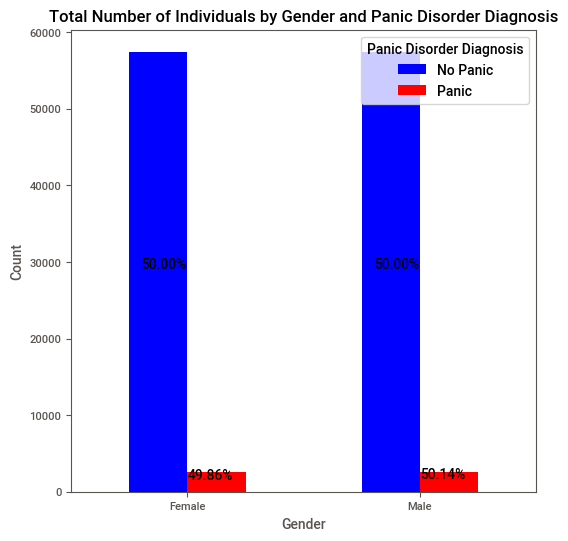

In [26]:
counts = panic_df_cleaned.groupby(['Gender', 'Panic Disorder Diagnosis']).size().reset_index(name='Count')

# Create a pivot table for plotting
pivot_table = counts.pivot(index='Gender', columns='Panic Disorder Diagnosis', values='Count').fillna(0)

# Create the bar plot
colors = ['blue', 'red']
ax = pivot_table.plot(kind='bar', figsize=(6, 6), color = colors)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Total Number of Individuals by Gender and Panic Disorder Diagnosis")
plt.xticks(rotation=0)  # Set x-axis labels
plt.legend(title='Panic Disorder Diagnosis', labels=['No Panic', 'Panic'])


# Calculate and add percentage labels at the center of each bar
for i, col in enumerate(pivot_table.columns):
    total = pivot_table[col].sum()
    for j, count in enumerate(pivot_table[col]):
        percentage = (count / total) * 100
        plt.text(j + i * 0.2 - 0.1, count / 2, f"{percentage:.2f}%", ha='center', va='bottom', color='black')

plt.show()

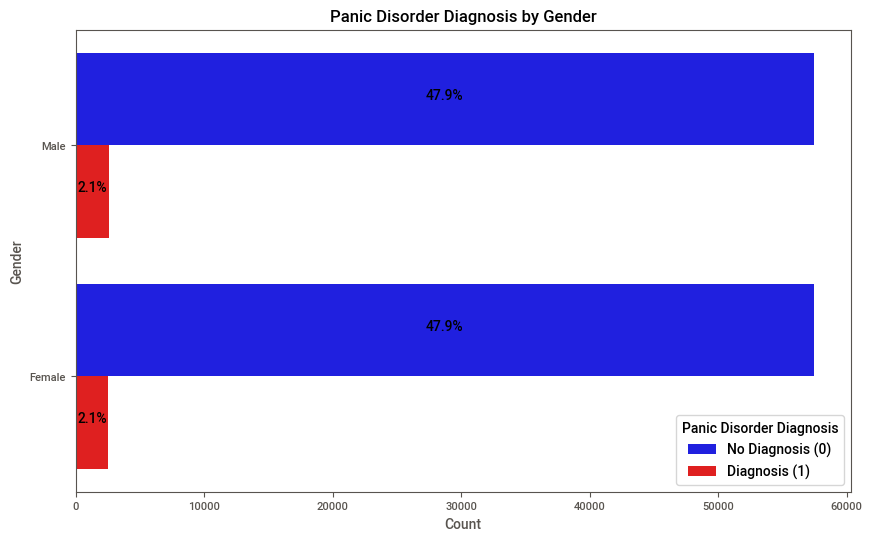

In [27]:
# Adjusting the plot to show counts on the x-axis and percentages as bar labels for Gender
plt.figure(figsize=(10, 6))

# Creating the plot with specified colors
ax = sns.countplot(data=panic_df_cleaned, y='Gender', hue='Panic Disorder Diagnosis', orient='h', palette=['blue', 'red'])

# Adding percentage labels to the bars
total = len(panic_df_cleaned)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2  # Adjusting position to be closer to the bar
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center')  # Horizontally centering the label

plt.title('Panic Disorder Diagnosis by Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.legend(title='Panic Disorder Diagnosis', labels=['No Diagnosis (0)', 'Diagnosis (1)'])

# Show the plot
plt.show()


## Age and Demograpy of the Panic Disorder Disribution

In [28]:
pdo_df = panic_df_cleaned.copy()

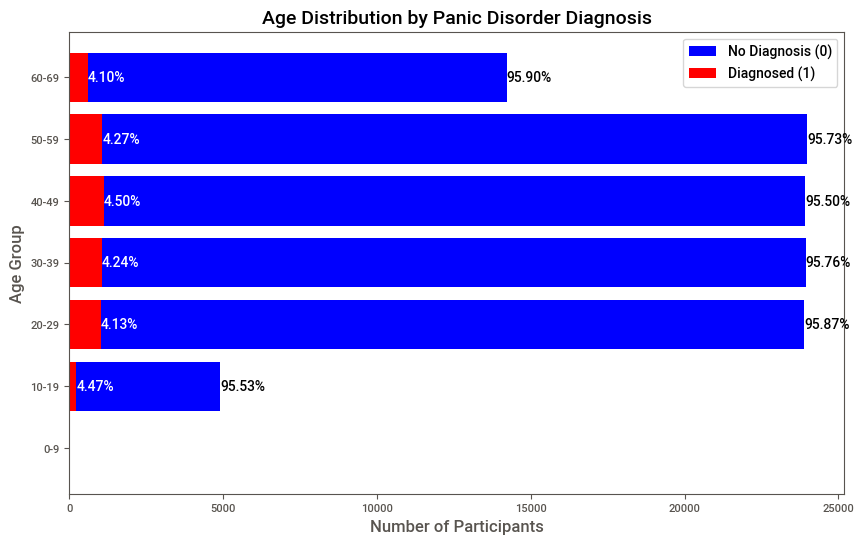

In [29]:
# Splitting the dataset based on Panic Disorder Diagnosis
diagnosis_0 = pdo_df[pdo_df['Panic Disorder Diagnosis'] == 0]
diagnosis_1 = pdo_df[pdo_df['Panic Disorder Diagnosis'] == 1]

# Creating age bins for better visualization
bins = list(range(0, pdo_df['Age'].max() + 10, 10))
labels = [f"{i}-{i+9}" for i in range(0, pdo_df['Age'].max(), 10)]

# Categorizing ages into bins with the corrected labels
diagnosis_0['Age Group'] = pd.cut(diagnosis_0['Age'], bins=bins, labels=labels, right=False)
diagnosis_1['Age Group'] = pd.cut(diagnosis_1['Age'], bins=bins, labels=labels, right=False)

# Counting occurrences in each bin for both diagnosis groups
age_counts_0 = diagnosis_0['Age Group'].value_counts().sort_index()
age_counts_1 = diagnosis_1['Age Group'].value_counts().sort_index()

# Calculating the total count for each age group across both diagnoses
total_counts = pdo_df['Age'].groupby(pd.cut(pdo_df['Age'], bins=bins, labels=labels, right=False)).count()

# Adjusting the plot to improve the visibility of percentage values on the bars
plt.figure(figsize=(10, 6))

# Plotting bars for 'No Diagnosis' group with original counts
plt.barh(age_counts_0.index, age_counts_0.values, color='blue', label='No Diagnosis (0)')

# Plotting bars for 'Diagnosed' group with original counts
plt.barh(age_counts_1.index, age_counts_1.values, color='red', label='Diagnosed (1)')

# Adding percentage values on bars with adjusted positions for better visibility
for index, value in age_counts_0.items():
    total = total_counts[index]
    if total > 0:
        percentage = (value / total) * 100
        plt.text(value + 0.5, index, f"{percentage:.2f}%", va='center', color='black', fontsize=10)

for index, value in age_counts_1.items():
    total = total_counts[index]
    if total > 0:
        percentage = (value / total) * 100
        plt.text(value + 0.5, index, f"{percentage:.2f}%", va='center', color='white', fontsize=10)

plt.xlabel('Number of Participants', fontsize = 12)
plt.ylabel('Age Group', fontsize = 12)
plt.title('Age Distribution by Panic Disorder Diagnosis', fontsize = 14)
plt.legend()
# plt.grid(axis='x')
plt.show()


## Demograpic of the Panic Disorder Disribution Based on Urban and Rural Area

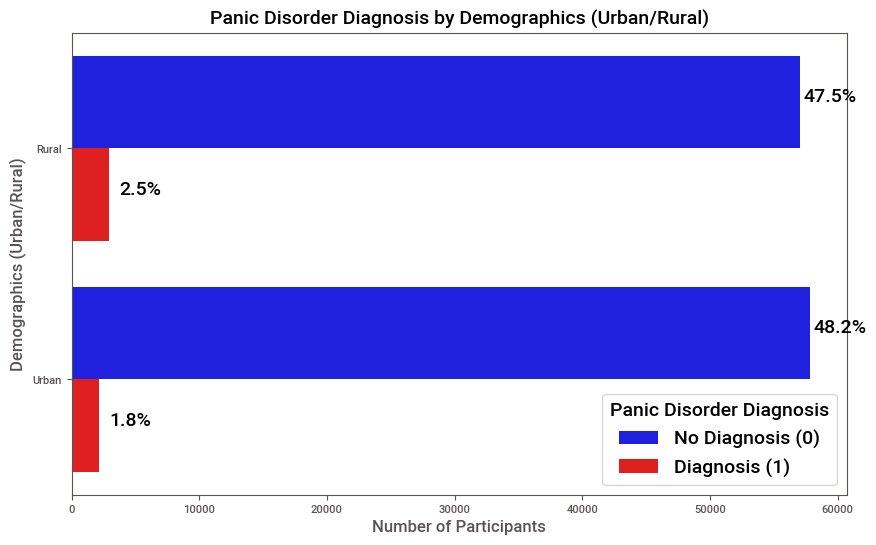

In [30]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.size'] = 14
# Creating the plot
ax = sns.countplot(data=panic_df_cleaned, y='Demographics', hue='Panic Disorder Diagnosis', orient='c', palette=['blue', 'red'])

# Adding percentage labels to the bars
total = len(panic_df_cleaned)
for p in ax.patches:
    percentage = f'{100 * p.get_width() / total:.1f}%'
    x = p.get_x() + p.get_width() + 0.02 * total
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Panic Disorder Diagnosis by Demographics (Urban/Rural)', fontsize = 14)
plt.xlabel('Number of Participants', fontsize = 12)
plt.ylabel('Demographics (Urban/Rural)', fontsize = 12)
plt.legend(title='Panic Disorder Diagnosis', labels=['No Diagnosis (0)', 'Diagnosis (1)'])

# Show the plot
plt.show()

# APPLYING APRIORI ALGORITHM ( Association Rule Mining)
1) Randomly Select Equal Data Sample for Panic disoder diagnosis
2) Feature Selection 
3) Using the apriori algorithm, explore the impact of the different feature of te panic disorder

### Randomly Select Equal Data Sample for Panic disoder diagnosis

In [31]:
def select_balanced_data(panic_df_cleaned, target_column):
    # Get all rows with target_column equal to 1
    positive_rows = panic_df_cleaned[panic_df_cleaned[target_column] == 1]
    
    # Count the number of positive cases
    num_positive_cases = len(positive_rows)
    
    # Get all rows with target_column equal to 0
    negative_rows = panic_df_cleaned[panic_df_cleaned[target_column] == 0]
    
    # Randomly select the same number of negative cases
    sampled_negative_rows = negative_rows.sample(n=num_positive_cases, random_state=42)
    
    # Concatenate positive and sampled negative rows
    balanced_df = pd.concat([positive_rows, sampled_negative_rows])
    
    return balanced_df

balanced_df = select_balanced_data(panic_df_cleaned, 'Panic Disorder Diagnosis')

In [32]:
balanced_df

,Participant ID,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
47,48,59,Male,No,Yes,High,Shortness of breath,Moderate,Significant,Urban,Diabetes,Depressive disorder,Not Applicable,Seeking therapy,Low,Sleep quality,1
107,108,41,Male,No,Yes,Moderate,Panic attacks,Moderate,Significant,Rural,Asthma,Bipolar disorder,Not Applicable,Socializing,Moderate,Sleep quality,1
109,110,31,Female,Yes,No,High,Dizziness,Moderate,Significant,Urban,Heart disease,Anxiety disorder,Alcohol,Meditation,Low,Sleep quality,1
110,111,19,Male,No,Yes,Moderate,Panic attacks,Severe,Significant,Urban,Asthma,Depressive disorder,Not Applicable,Exercise,Low,Sleep quality,1
117,118,65,Female,No,Yes,High,Dizziness,Mild,Significant,Rural,Diabetes,Depressive disorder,Alcohol,Seeking therapy,High,Sleep quality,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,3395,32,Female,Yes,No,Moderate,Shortness of breath,Severe,Moderate,Urban,Asthma,Not Applicable,Not Applicable,Exercise,Low,Exercise,0
75517,75518,43,Female,Yes,Yes,High,Chest pain,Mild,Mild,Rural,Asthma,Bipolar disorder,Not Applicable,Seeking therapy,Moderate,Diet,0
34004,34005,38,Female,Yes,Yes,Low,Shortness of breath,Moderate,Mild,Rural,Heart disease,Depressive disorder,Not Applicable,Socializing,Moderate,Diet,0
39482,39483,26,Female,Yes,Yes,Moderate,Dizziness,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Not Applicable,Seeking therapy,Moderate,Diet,0


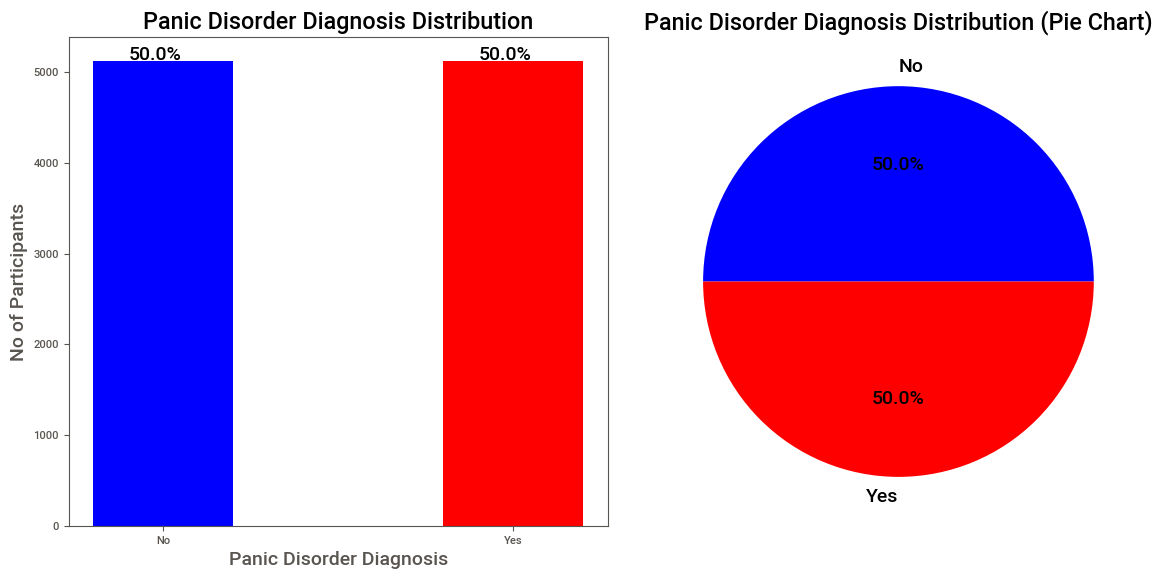

In [33]:
def balanced_target():
    values = balanced_df['Panic Disorder Diagnosis'].value_counts().tolist()
    total = sum(values)
    percentages = [(count / total) * 100 for count in values]

    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the bar chart in the first subplot (ax1)
    colors = ['blue', 'red']
    fontsize=14
    bars = ax1.bar(x=['No', 'Yes'], height=values, width=0.4, color=colors)
    ax1.set_title('Panic Disorder Diagnosis Distribution')
    ax1.set_xlabel('Panic Disorder Diagnosis', fontsize=14)
    ax1.set_ylabel('No of Participants', fontsize=14)

    # Add percentage labels on the bars
    for bar, percentage in zip(bars, percentages):
        ax1.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 5, f'{percentage:.1f}%', fontsize=14)

    # Plot the pie chart in the second subplot (ax2)
    ax2.pie(values, labels=['No', 'Yes'], autopct='%1.1f%%', colors=colors, textprops={'fontsize': 14})
    ax2.set_title('Panic Disorder Diagnosis Distribution (Pie Chart)')

    # Adjust spacing between subplots
    plt.tight_layout()

    plt.show()


balanced_target()

# DATA Preparation (For Apriori Association Rule Mining)
1) Label Encoding 
2) Feature extraction Uisng Kbest and Random For
3) 

In [34]:
panic_features = balanced_df[['Panic Disorder Diagnosis','Age', 'Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']]

panic_features

,Panic Disorder Diagnosis,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
47,1,59,Male,No,Yes,High,Shortness of breath,Moderate,Significant,Urban,Diabetes,Depressive disorder,Not Applicable,Seeking therapy,Low,Sleep quality
107,1,41,Male,No,Yes,Moderate,Panic attacks,Moderate,Significant,Rural,Asthma,Bipolar disorder,Not Applicable,Socializing,Moderate,Sleep quality
109,1,31,Female,Yes,No,High,Dizziness,Moderate,Significant,Urban,Heart disease,Anxiety disorder,Alcohol,Meditation,Low,Sleep quality
110,1,19,Male,No,Yes,Moderate,Panic attacks,Severe,Significant,Urban,Asthma,Depressive disorder,Not Applicable,Exercise,Low,Sleep quality
117,1,65,Female,No,Yes,High,Dizziness,Mild,Significant,Rural,Diabetes,Depressive disorder,Alcohol,Seeking therapy,High,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,0,32,Female,Yes,No,Moderate,Shortness of breath,Severe,Moderate,Urban,Asthma,Not Applicable,Not Applicable,Exercise,Low,Exercise
75517,0,43,Female,Yes,Yes,High,Chest pain,Mild,Mild,Rural,Asthma,Bipolar disorder,Not Applicable,Seeking therapy,Moderate,Diet
34004,0,38,Female,Yes,Yes,Low,Shortness of breath,Moderate,Mild,Rural,Heart disease,Depressive disorder,Not Applicable,Socializing,Moderate,Diet
39482,0,26,Female,Yes,Yes,Moderate,Dizziness,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Not Applicable,Seeking therapy,Moderate,Diet


## Label Encoding

In [35]:
def encode_features(data):
    # Define categorical features
    categ_features = [
        'Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity',
        'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use',
        'Coping Mechanisms', 'Social Support', 'Lifestyle Factors'
    ]

    mapping_dict = {}

    for col in categ_features:
        unique_values = panic_features[col].unique()
        print('=' * 40)
        print(f'Category: {col}')

        for i, value in enumerate(unique_values):
            mapping_dict[value] = i
            print(f'Label: {value} ({i})')

        # Apply/replace new values in the DataFrame
        panic_features[col] = panic_features[col].map(mapping_dict)

    return data, mapping_dict


# DataFrame 'df' with the specified columns
encoded_df, mapping_dict = encode_features(panic_features.copy())


Category: Gender
Label: Male (0)
Label: Female (1)
Category: Family History
Label: No (0)
Label: Yes (1)
Category: Personal History
Label: Yes (0)
Label: No (1)
Category: Current Stressors
Label: High (0)
Label: Moderate (1)
Label: Low (2)
Category: Symptoms
Label: Shortness of breath (0)
Label: Panic attacks (1)
Label: Dizziness (2)
Label: Chest pain (3)
Label: Fear of losing control (4)
Category: Severity
Label: Moderate (0)
Label: Severe (1)
Label: Mild (2)
Category: Impact on Life
Label: Significant (0)
Label: Mild (1)
Label: Moderate (2)
Category: Demographics
Label: Urban (0)
Label: Rural (1)
Category: Medical History
Label: Diabetes (0)
Label: Asthma (1)
Label: Heart disease (2)
Label: Not Applicable (3)
Category: Psychiatric History
Label: Depressive disorder (0)
Label: Bipolar disorder (1)
Label: Anxiety disorder (2)
Label: Not Applicable (3)
Category: Substance Use
Label: Not Applicable (0)
Label: Alcohol (1)
Label: Drugs (2)
Category: Coping Mechanisms
Label: Seeking therapy

## Feature Extraction (Using K-Best and Random Forest)
Selected Features: 'Panic Disorder Diagnosis', 'Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors'

## Using K-Best

In [36]:
X = panic_features.drop(["Panic Disorder Diagnosis"], axis=1)

# Extract the target variable
y = panic_features["Panic Disorder Diagnosis"].values

# Using SelectKBest for feature selection
k = 12  # Select top 10 features, adjust as needed
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

# To get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected features:")
print(selected_features)

Selected features:
Index(['Family History', 'Personal History', 'Current Stressors', 'Symptoms',
       'Impact on Life', 'Demographics', 'Medical History',
       'Psychiatric History', 'Substance Use', 'Coping Mechanisms',
       'Social Support', 'Lifestyle Factors'],
      dtype='object')


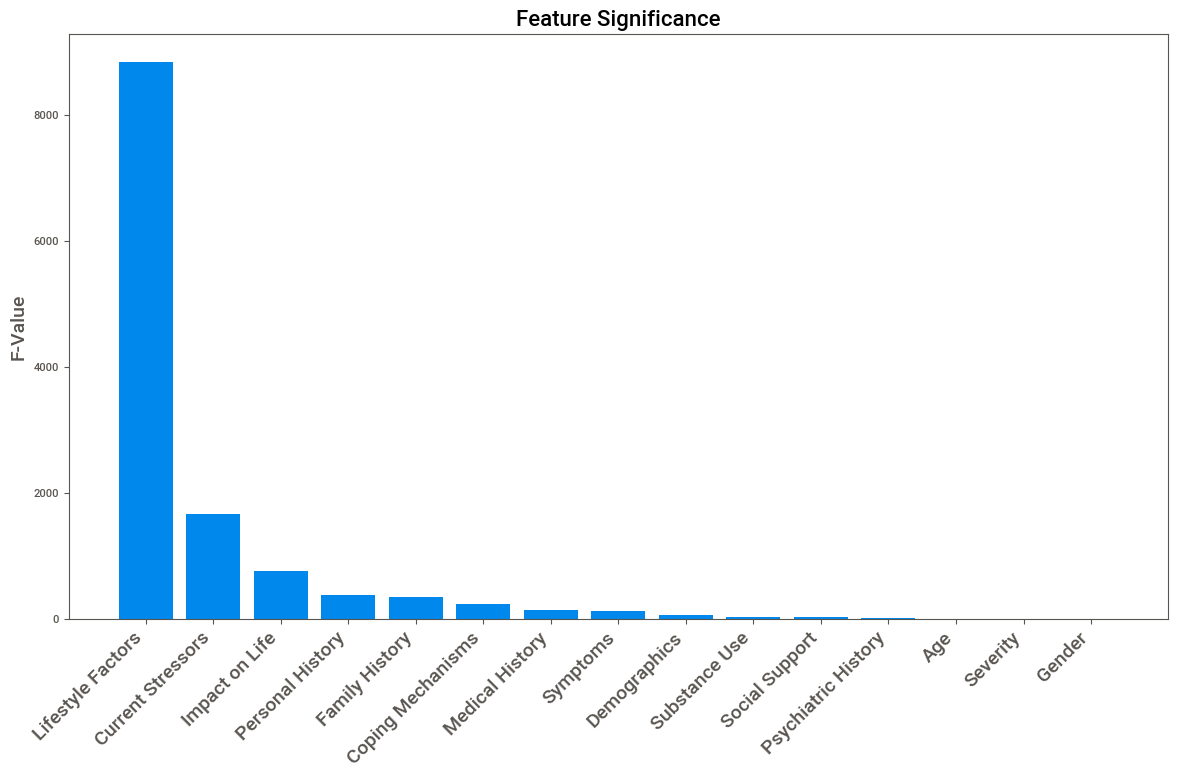

In [37]:
X = panic_features.drop(['Panic Disorder Diagnosis'], axis=1)

# Extract the target variable
y = panic_features["Panic Disorder Diagnosis"].values


# Using SelectKBest for feature selection
k = 'all'  # Evaluate all features, adjust as needed
selector = SelectKBest(f_classif, k=k)
selector.fit(X, y)

# Retrieving the scores
scores = selector.scores_

# Sorting the scores
sorted_indices = scores.argsort()[::-1]
sorted_scores = scores[sorted_indices]
features_sorted = X.columns[sorted_indices]

# Plotting the feature importances
plt.figure(figsize=(12, 8))
plt.bar(features_sorted, sorted_scores, align='center')
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylabel('F-Value', fontsize=14)
plt.title('Feature Significance', fontsize=16)
plt.tight_layout()
plt.show()


In [38]:
# Calculate percentages
total_score = scores.sum()
percentage_scores = (scores / total_score) * 100

# Create a DataFrame for tabular display
df = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': scores,
    'Percentage (%)': percentage_scores
})

# Sorting the DataFrame by F-Value in descending order
df = df.sort_values(by='F-Value', ascending=True)

# Display the DataFrame
print(df)

                Feature      F-Value  Percentage (%)
1                Gender     0.009752        0.000077
6              Severity     0.095254        0.000750
0                   Age     0.596777        0.004696
10  Psychiatric History    17.602994        0.138526
13       Social Support    36.175315        0.284680
11        Substance Use    42.733717        0.336291
8          Demographics    65.706009        0.517071
5              Symptoms   129.336380        1.017808
9       Medical History   148.917041        1.171897
12    Coping Mechanisms   240.456117        1.892260
2        Family History   351.807494        2.768536
3      Personal History   385.495704        3.033644
7        Impact on Life   769.631624        6.056587
4     Current Stressors  1672.838535       13.164339
14    Lifestyle Factors  8845.946645       69.612839


## Using Random Forest Feature Selection

In [39]:
# Splitting the dataset into features (X) and target (y)
X = panic_features.drop(['Panic Disorder Diagnosis'], axis=1)
y = panic_features['Panic Disorder Diagnosis']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Extracting feature importance
feature_importance = rf_classifier.feature_importances_

# Creating a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
14,Lifestyle Factors,0.410073
4,Current Stressors,0.129061
5,Symptoms,0.096036
6,Severity,0.066951
7,Impact on Life,0.057892
3,Personal History,0.043410
2,Family History,0.041725
12,Coping Mechanisms,0.028787
0,Age,0.027809
13,Social Support,0.025831


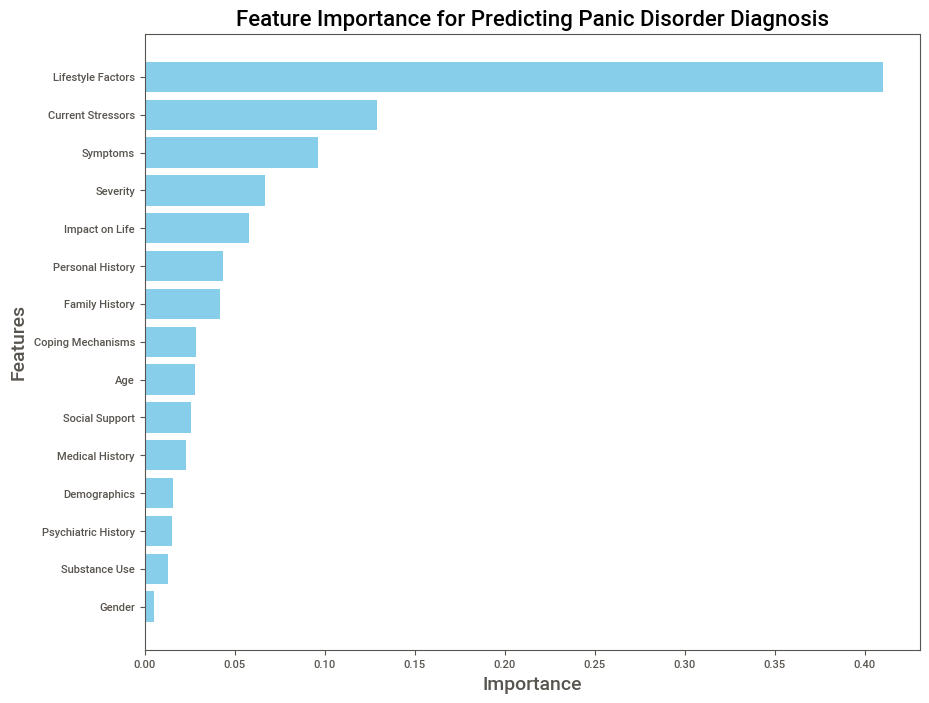

In [40]:
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for Predicting Panic Disorder Diagnosis', fontsize=16)
plt.show()

## Performing Rule MIning Using the 12 Most Significant Features

In [41]:
extracted_feat = balanced_df[['Panic Disorder Diagnosis', 'Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use', 'Coping Mechanisms', 'Social Support', 'Lifestyle Factors']]

extracted_feat

,Panic Disorder Diagnosis,Gender,Family History,Personal History,Current Stressors,Symptoms,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors
47,1,Male,No,Yes,High,Shortness of breath,Significant,Urban,Diabetes,Depressive disorder,Not Applicable,Seeking therapy,Low,Sleep quality
107,1,Male,No,Yes,Moderate,Panic attacks,Significant,Rural,Asthma,Bipolar disorder,Not Applicable,Socializing,Moderate,Sleep quality
109,1,Female,Yes,No,High,Dizziness,Significant,Urban,Heart disease,Anxiety disorder,Alcohol,Meditation,Low,Sleep quality
110,1,Male,No,Yes,Moderate,Panic attacks,Significant,Urban,Asthma,Depressive disorder,Not Applicable,Exercise,Low,Sleep quality
117,1,Female,No,Yes,High,Dizziness,Significant,Rural,Diabetes,Depressive disorder,Alcohol,Seeking therapy,High,Sleep quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,0,Female,Yes,No,Moderate,Shortness of breath,Moderate,Urban,Asthma,Not Applicable,Not Applicable,Exercise,Low,Exercise
75517,0,Female,Yes,Yes,High,Chest pain,Mild,Rural,Asthma,Bipolar disorder,Not Applicable,Seeking therapy,Moderate,Diet
34004,0,Female,Yes,Yes,Low,Shortness of breath,Mild,Rural,Heart disease,Depressive disorder,Not Applicable,Socializing,Moderate,Diet
39482,0,Female,Yes,Yes,Moderate,Dizziness,Moderate,Rural,Heart disease,Bipolar disorder,Not Applicable,Seeking therapy,Moderate,Diet


### Perform One Hot Encoding on The Selected Features

In [42]:
apriori_df = pd.get_dummies(extracted_feat, columns= extracted_feat.columns)

apriori_df

,Panic Disorder Diagnosis_0,Panic Disorder Diagnosis_1,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
47,False,True,False,True,True,False,False,True,True,False,...,False,False,True,False,False,True,False,False,False,True
107,False,True,False,True,True,False,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
109,False,True,True,False,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
110,False,True,False,True,True,False,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
117,False,True,True,False,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,True,False,True,False,False,True,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
75517,True,False,True,False,False,True,False,True,True,False,...,False,False,True,False,False,False,True,True,False,False
34004,True,False,True,False,False,True,False,True,False,True,...,False,False,False,True,False,False,True,True,False,False
39482,True,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False


### Select Items (Features) With Highest Frequency (20% min Support)

In [43]:
freq_feat = apriori(apriori_df, min_support=0.2, use_colnames=True)
freq_feat["length"] = freq_feat["itemsets"].apply(lambda x: len(x))
freq_feat

,support,itemsets,length
0,0.500000,(Panic Disorder Diagnosis_0),1
1,0.500000,(Panic Disorder Diagnosis_1),1
2,0.498147,(Gender_Female),1
3,0.501853,(Gender_Male),1
4,0.431623,(Family History_No),1
...,...,...,...
140,0.202985,"(Lifestyle Factors_Sleep quality, Impact on Li...",4
141,0.243172,"(Lifestyle Factors_Sleep quality, Personal His...",4
142,0.210203,"(Lifestyle Factors_Sleep quality, Impact on Li...",4
143,0.221518,"(Lifestyle Factors_Sleep quality, Impact on Li...",4


In [44]:
pd.set_option("display.max_colwidth", None)
app_highest_freq = freq_feat[(freq_feat["length"] > 2) & (freq_feat["support"]> 0.2)]
app_highest_freq

,support,itemsets,length
110,0.249317,"(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1, Gender_Female)",3
111,0.250683,"(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1, Gender_Male)",3
112,0.237612,"(Panic Disorder Diagnosis_1, Family History_Yes, Current Stressors_High)",3
113,0.202985,"(Impact on Life_Significant, Panic Disorder Diagnosis_1, Family History_Yes)",3
114,0.329302,"(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1, Family History_Yes)",3
115,0.243172,"(Personal History_Yes, Panic Disorder Diagnosis_1, Current Stressors_High)",3
116,0.210203,"(Personal History_Yes, Impact on Life_Significant, Panic Disorder Diagnosis_1)",3
117,0.337495,"(Lifestyle Factors_Sleep quality, Personal History_Yes, Panic Disorder Diagnosis_1)",3
118,0.221518,"(Impact on Life_Significant, Panic Disorder Diagnosis_1, Current Stressors_High)",3
119,0.212251,"(Panic Disorder Diagnosis_1, Demographics_Rural, Current Stressors_High)",3


### Calculating Confidence level of the Selected Items (Features)

In [45]:
asso_rule = association_rules(freq_feat, metric = "confidence", min_threshold= 0.7)
asso_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Panic Disorder Diagnosis_1),(Current Stressors_High),0.500000,0.515704,0.361490,0.722981,1.401929,0.103638,1.748239,0.573394
1,(Current Stressors_High),(Panic Disorder Diagnosis_1),0.515704,0.500000,0.361490,0.700965,1.401929,0.103638,1.672043,0.591988
2,(Lifestyle Factors_Sleep quality),(Panic Disorder Diagnosis_1),0.647776,0.500000,0.500000,0.771872,1.543743,0.176112,2.191749,1.000000
3,(Panic Disorder Diagnosis_1),(Lifestyle Factors_Sleep quality),0.500000,0.647776,0.500000,1.000000,1.543743,0.176112,inf,0.704448
4,(Current Stressors_High),(Lifestyle Factors_Sleep quality),0.515704,0.647776,0.400410,0.776433,1.198613,0.066349,1.575472,0.342151
...,...,...,...,...,...,...,...,...,...,...
71,"(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1, Demographics_Rural)",(Current Stressors_High),0.288236,0.515704,0.212251,0.736379,1.427910,0.063607,1.837091,0.421032
72,"(Lifestyle Factors_Sleep quality, Current Stressors_High, Demographics_Rural)",(Panic Disorder Diagnosis_1),0.231272,0.500000,0.212251,0.917756,1.835512,0.096615,6.079487,0.592138
73,"(Current Stressors_High, Panic Disorder Diagnosis_1, Demographics_Rural)",(Lifestyle Factors_Sleep quality),0.212251,0.647776,0.212251,1.000000,1.543743,0.074760,inf,0.447127
74,"(Panic Disorder Diagnosis_1, Demographics_Rural)","(Lifestyle Factors_Sleep quality, Current Stressors_High)",0.288236,0.400410,0.212251,0.736379,1.839064,0.096839,2.274441,0.641007


### Calculating The Lift of The Selected Items (Features

In [46]:
lift_rule = association_rules(freq_feat, metric= "lift", min_threshold = 1)
lift_rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Panic Disorder Diagnosis_0),(Gender_Male),0.500000,0.501853,0.251171,0.502341,1.000972,0.000244,1.000980,0.001942
1,(Gender_Male),(Panic Disorder Diagnosis_0),0.501853,0.500000,0.251171,0.500486,1.000972,0.000244,1.000973,0.001949
2,(Family History_No),(Panic Disorder Diagnosis_0),0.431623,0.500000,0.260925,0.604520,1.209040,0.045113,1.264286,0.304195
3,(Panic Disorder Diagnosis_0),(Family History_No),0.500000,0.431623,0.260925,0.521849,1.209040,0.045113,1.188698,0.345794
4,(Panic Disorder Diagnosis_0),(Personal History_No),0.500000,0.418943,0.256438,0.512876,1.224214,0.046966,1.192831,0.366299
...,...,...,...,...,...,...,...,...,...,...
337,"(Current Stressors_High, Demographics_Rural)","(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1)",0.288334,0.500000,0.212251,0.736130,1.472260,0.068084,1.894872,0.450734
338,(Lifestyle Factors_Sleep quality),"(Current Stressors_High, Panic Disorder Diagnosis_1, Demographics_Rural)",0.647776,0.212251,0.212251,0.327661,1.543743,0.074760,1.171655,1.000000
339,(Panic Disorder Diagnosis_1),"(Lifestyle Factors_Sleep quality, Current Stressors_High, Demographics_Rural)",0.500000,0.231272,0.212251,0.424503,1.835512,0.096615,1.335763,0.910386
340,(Demographics_Rural),"(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1, Current Stressors_High)",0.536676,0.361490,0.212251,0.395493,1.094061,0.018248,1.056248,0.185559


In [47]:
lift_rule["antecedent_len"] = lift_rule["antecedents"].apply(lambda x: len(x))

In [48]:
lift_rule[lift_rule ["antecedent_len"]>=2]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
94,"(Lifestyle Factors_Sleep quality, Panic Disorder Diagnosis_1)",(Gender_Female),0.500000,0.498147,0.249317,0.498634,1.000979,0.000244,1.000973,0.001956,2
95,"(Lifestyle Factors_Sleep quality, Gender_Female)",(Panic Disorder Diagnosis_1),0.322376,0.500000,0.249317,0.773374,1.546747,0.088129,2.206275,0.521649,2
96,"(Panic Disorder Diagnosis_1, Gender_Female)",(Lifestyle Factors_Sleep quality),0.249317,0.647776,0.249317,1.000000,1.543743,0.087815,inf,0.469205,2
100,"(Lifestyle Factors_Sleep quality, Gender_Male)",(Panic Disorder Diagnosis_1),0.325400,0.500000,0.250683,0.770384,1.540767,0.087983,2.177546,0.520268,2
101,"(Panic Disorder Diagnosis_1, Gender_Male)",(Lifestyle Factors_Sleep quality),0.250683,0.647776,0.250683,1.000000,1.543743,0.088296,inf,0.470060,2
...,...,...,...,...,...,...,...,...,...,...,...
333,"(Lifestyle Factors_Sleep quality, Demographics_Rural)","(Panic Disorder Diagnosis_1, Current Stressors_High)",0.359930,0.361490,0.212251,0.589702,1.631307,0.082140,1.556209,0.604613,2
334,"(Lifestyle Factors_Sleep quality, Current Stressors_High)","(Panic Disorder Diagnosis_1, Demographics_Rural)",0.400410,0.288236,0.212251,0.530085,1.839064,0.096839,1.514665,0.760928,2
335,"(Panic Disorder Diagnosis_1, Demographics_Rural)","(Lifestyle Factors_Sleep quality, Current Stressors_High)",0.288236,0.400410,0.212251,0.736379,1.839064,0.096839,2.274441,0.641007,2
336,"(Panic Disorder Diagnosis_1, Current Stressors_High)","(Lifestyle Factors_Sleep quality, Demographics_Rural)",0.361490,0.359930,0.212251,0.587156,1.631307,0.082140,1.550392,0.606091,2


### Extracting the Panic Disoder Diagnosis as consiquence, with min_threshold of 2 anticident, based on the Decending order of lift values

In [49]:
#### Extracting the consequence for Panic Disorder Diagnosis
panic_yes = lift_rule[(lift_rule ["consequents"]=={"Panic Disorder Diagnosis_1"}) & (lift_rule ["antecedent_len"]>=1)]
panic_yes = panic_yes.sort_values(by="lift", ascending=False)
panic_yes.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,antecedent_len
315,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.229809,0.5,0.221518,0.963922,1.927844,0.106613,13.858824,0.624891,3
260,"(Lifestyle Factors_Sleep quality, Family History_Yes, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.252829,0.5,0.237612,0.939815,1.879630,0.111198,8.307692,0.626336,3
287,"(Lifestyle Factors_Sleep quality, Personal History_Yes, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.260925,0.5,0.243172,0.931963,1.863925,0.112710,7.348901,0.627132,3
273,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant, Family History_Yes)",(Panic Disorder Diagnosis_1),0.220445,0.5,0.202985,0.920796,1.841593,0.092762,6.312849,0.586221,3
330,"(Lifestyle Factors_Sleep quality, Current Stressors_High, Demographics_Rural)",(Panic Disorder Diagnosis_1),0.231272,0.5,0.212251,0.917756,1.835512,0.096615,6.079487,0.592138,3
301,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant, Personal History_Yes)",(Panic Disorder Diagnosis_1),0.230979,0.5,0.210203,0.910051,1.820101,0.094713,5.558685,0.585914,3
153,"(Lifestyle Factors_Sleep quality, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.400410,0.5,0.361490,0.902801,1.805603,0.161286,5.144110,0.744122,2
159,"(Symptoms_Panic attacks, Lifestyle Factors_Sleep quality)",(Panic Disorder Diagnosis_1),0.234296,0.5,0.210398,0.898002,1.796003,0.093250,4.902041,0.578824,2
164,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant)",(Panic Disorder Diagnosis_1),0.352321,0.5,0.309306,0.877907,1.755814,0.133145,4.095238,0.664625,2
117,"(Lifestyle Factors_Sleep quality, Family History_Yes)",(Panic Disorder Diagnosis_1),0.395240,0.5,0.329302,0.833169,1.666338,0.131682,2.997041,0.661223,2


### Extracting on the "antecedents", "consequents", "support", "confidence", "lift"

In [50]:
top_panic_features = panic_yes[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)

# Round numerical values to 3 decimal places
columns_to_round = ["support", "confidence", "lift"]
top_panic_features[columns_to_round] = top_panic_features[columns_to_round].round(3)

# Reset index and set it to start from 1
top_panic_features.index = range(1, len(top_panic_features) + 1)

top_panic_features

,antecedents,consequents,support,confidence,lift
1,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.222,0.964,1.928
2,"(Lifestyle Factors_Sleep quality, Family History_Yes, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.238,0.940,1.880
3,"(Lifestyle Factors_Sleep quality, Personal History_Yes, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.243,0.932,1.864
4,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant, Family History_Yes)",(Panic Disorder Diagnosis_1),0.203,0.921,1.842
5,"(Lifestyle Factors_Sleep quality, Current Stressors_High, Demographics_Rural)",(Panic Disorder Diagnosis_1),0.212,0.918,1.836
6,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant, Personal History_Yes)",(Panic Disorder Diagnosis_1),0.210,0.910,1.820
7,"(Lifestyle Factors_Sleep quality, Current Stressors_High)",(Panic Disorder Diagnosis_1),0.361,0.903,1.806
8,"(Symptoms_Panic attacks, Lifestyle Factors_Sleep quality)",(Panic Disorder Diagnosis_1),0.210,0.898,1.796
9,"(Lifestyle Factors_Sleep quality, Impact on Life_Significant)",(Panic Disorder Diagnosis_1),0.309,0.878,1.756
10,"(Lifestyle Factors_Sleep quality, Family History_Yes)",(Panic Disorder Diagnosis_1),0.329,0.833,1.666


# PREDICTIVE MODELING
1) Data Pre-Processing (Label encoding and Standarzation)
2) Building of First Sets of Model (with Unbalanced Dataset) - with and without feature extraction  
3) Building Second set of Model (with Balance Dataset) - with and without feature extraction
5) Build the Third Models using esemble method (Stacking Model) - with the best performing models

## Label Encoding

In [51]:
def encode_features(data):
    # Define categorical features
    categ_features = [
        'Gender', 'Family History', 'Personal History', 'Current Stressors', 'Symptoms', 'Severity',
        'Impact on Life', 'Demographics', 'Medical History', 'Psychiatric History', 'Substance Use',
        'Coping Mechanisms', 'Social Support', 'Lifestyle Factors'
    ]

    mapping_dict = {}

    for col in categ_features:
        unique_values = panic_df_cleaned[col].unique()
        print('=' * 40)
        print(f'Category: {col}')

        for i, value in enumerate(unique_values):
            mapping_dict[value] = i
            print(f'Label: {value} ({i})')

        # Apply/replace new values in the DataFrame
        panic_df_cleaned[col] = panic_df_cleaned[col].map(mapping_dict)

    return data, mapping_dict


# Assuming you have a DataFrame 'df' with the specified columns
encoded_df, mapping_dict = encode_features(panic_df_cleaned.copy())

# Now, 'encoded_df' contains the mapped values, and 'mapping_dict' holds the mapping for each category.


Category: Gender
Label: Male (0)
Label: Female (1)
Category: Family History
Label: No (0)
Label: Yes (1)
Category: Personal History
Label: Yes (0)
Label: No (1)
Category: Current Stressors
Label: Moderate (0)
Label: High (1)
Label: Low (2)
Category: Symptoms
Label: Shortness of breath (0)
Label: Panic attacks (1)
Label: Chest pain (2)
Label: Dizziness (3)
Label: Fear of losing control (4)
Category: Severity
Label: Mild (0)
Label: Moderate (1)
Label: Severe (2)
Category: Impact on Life
Label: Mild (0)
Label: Significant (1)
Label: Moderate (2)
Category: Demographics
Label: Rural (0)
Label: Urban (1)
Category: Medical History
Label: Diabetes (0)
Label: Asthma (1)
Label: Not Applicable (2)
Label: Heart disease (3)
Category: Psychiatric History
Label: Bipolar disorder (0)
Label: Anxiety disorder (1)
Label: Depressive disorder (2)
Label: Not Applicable (3)
Category: Substance Use
Label: Not Applicable (0)
Label: Drugs (1)
Label: Alcohol (2)
Category: Coping Mechanisms
Label: Socializing (0)

## Data Standarzation AND Splitting for the First model

In [52]:
def preprocess_dataset():
    # Droping the target column and any other columns irrelevant exclude
    X_a = panic_df_cleaned.drop(["Panic Disorder Diagnosis", "Participant ID"], axis=1)

    # Extract the target variable
    y_a = panic_df_cleaned["Panic Disorder Diagnosis"].values

    # Split the dataset into training and testing sets
    X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.2, random_state=42)

    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()

    # Fit and transform the scaler on the training features
    X_train_a = scaler.fit_transform(X_train_a)

    # Transform the testing features using the same scaler
    X_test_a = scaler.transform(X_test_a)

    return X_train_a, X_test_a, y_train_a, y_test_a

X_train_a, X_test_a, y_train_a, y_test_a = preprocess_dataset()

In [53]:
print(f'Training Data Set: {len(X_train_a)}')
print(f'Testing Data Set: {len(X_test_a)}')

Training Data Set: 96000
Testing Data Set: 24000


## Building the The First Sets of Models without Balancing the Data Set and all the Features (Model_1a)
## Algorithms Used<br>
Decision Tree <br> 
Random Forest<br>
Support Vector Machine<br> 
K-Nearest Neighbours<br>
Gaussian Naive Bayes<br> 
Logistics Regressor

In [54]:
# Dictionaries for storing evaluation metrics
accuracy_scores = {}
f1_scores = {}
precision_scores = {}
recall_scores = {}
auc_scores = {}
true_negatives = {}
false_positives = {}
false_negatives = {}
true_positives = {}

# Classifier labels
classifier_labels = ['DT', 'RF', 'NB', 'KNN', 'SVM', 'LR']

def perform_classification(classifier, label, X_train, y_train, X_test, y_test):
    # Train the classifier
    clf = classifier.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Calculate and store various scores in dictionaries
    accuracy_scores[label] = accuracy_score(y_test, y_pred)
    f1_scores[label] = f1_score(y_test, y_pred, zero_division=0)
    precision_scores[label] = precision_score(y_test, y_pred, zero_division=0)
    recall_scores[label] = recall_score(y_test, y_pred, zero_division=0)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_scores[label] = auc(fpr, tpr)
    
    
    # Calculating and storing the confusion matrix parameters
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    true_negatives[label] = tn
    false_positives[label] = fp
    false_negatives[label] = fn
    true_positives[label] = tp
    
    # Print the obtained accuracy
    print('Accuracy for {}: {:.4f}'.format(label, accuracy_score(y_test, y_pred)))

# List of classifiers to be used
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(),
    SVC(kernel='linear'),
    LogisticRegression()
]


In [55]:
# Call the classification function for each classifier
for classifier, label in zip(classifiers, classifier_labels):
    perform_classification(classifier, label, X_train_a, y_train_a, X_test_a, y_test_a)

Accuracy for DT: 0.9982
Accuracy for RF: 0.9936
Accuracy for NB: 0.7087
Accuracy for KNN: 0.9659
Accuracy for SVM: 0.9580
Accuracy for LR: 0.9575


## First Models Performance Evaluation (Model_1a)

In [56]:
def model_performance():
    
    metrics = ['Accuracy', 'F1-score', 'Specificity', 'Sensitivity', 'AUC', 'TN', 'FP', 'FN', 'TP']
    
    scores_df = pd.DataFrame(data=[accuracy_scores, f1_scores, precision_scores, recall_scores, auc_scores,
                                   true_negatives, false_positives, false_negatives, true_positives], index=metrics)
    
    return scores_df


# Calling the funtion to print perforncance
model_performance()

,DT,RF,NB,KNN,SVM,LR
Accuracy,0.998250,0.993625,0.708708,0.965917,0.958,0.957542
F1-score,0.979228,0.917874,0.223826,0.458278,0.000,0.032289
Specificity,0.976331,1.000000,0.126016,0.689243,0.000,0.377778
Sensitivity,0.982143,0.848214,1.000000,0.343254,0.000,0.016865
AUC,0.990550,0.924107,0.847969,0.668234,0.500,0.507824
TN,22968.000000,22992.000000,16001.000000,22836.000000,22992.000,22964.000000
FP,24.000000,0.000000,6991.000000,156.000000,0.000,28.000000
FN,18.000000,153.000000,0.000000,662.000000,1008.000,991.000000
TP,990.000000,855.000000,1008.000000,346.000000,0.000,17.000000


## Confusion Matrix for First Sets of Model_1a

In [57]:
def plot_confusion_matrices(classifiers, classifier_labels, X_train, y_train, X_test, y_test):
    # Setting up the figure
    fig, axes = plt.subplots(nrows=1, ncols=len(classifiers), figsize=(20, 9), dpi=300, sharey=True)
    
    
    if len(classifiers) == 1:
        axes = [axes]

    # Iterate over classifiers
    for clf, label, ax in zip(classifiers, classifier_labels, axes):
        # Train the classifier and predict on test data
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute confusion matrix
        matrix = confusion_matrix(y_test, y_pred)

        # Create a heatmap
        sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', ax=ax, square=True)

        # Labels, title and ticks
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')
        ax.set_title(f'{label} Confusion Matrix')
        ax.xaxis.set_ticklabels(['False', 'True'])
        ax.yaxis.set_ticklabels(['False', 'True'])

    plt.tight_layout()
    plt.show()
    
plt.savefig('confusion_matrices_a.png') # Save the plot as a high-resolution PNG file

<Figure size 640x480 with 0 Axes>

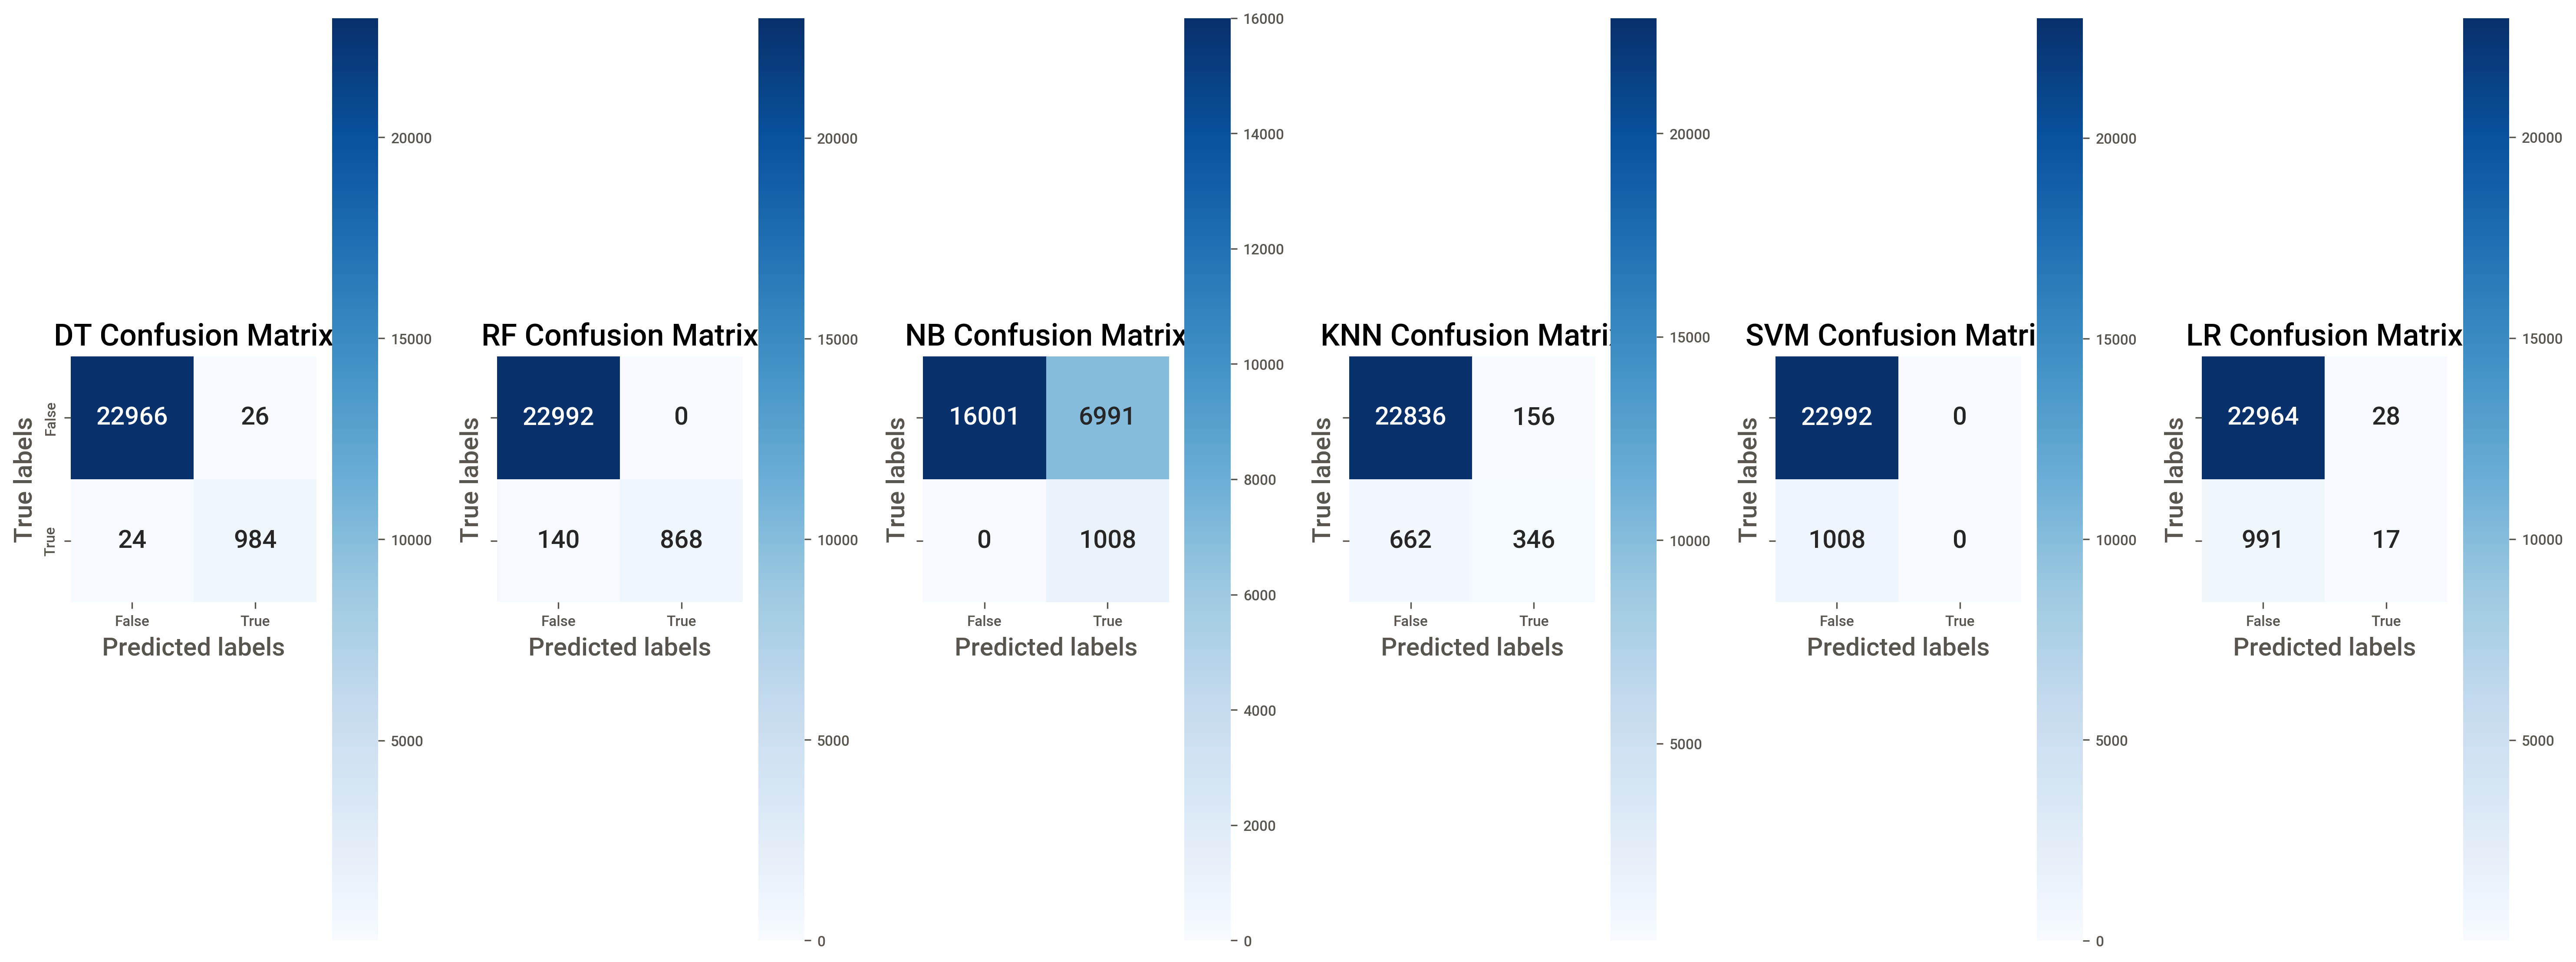

In [58]:
# applying the function
plot_confusion_matrices(classifiers, classifier_labels, X_train_a, y_train_a, X_test_a, y_test_a)

## Building Model_1b With Feature Selection of 12 Best Scoring Features From KBest (Model_1b)
Family History, Personal History, Symptoms, Current Stressors, Impact on Lif, Demographics, Medical History, Psychiatric History, Substance Use, Coping Mechanisms, Social Support and Lifestyle Factors

In [59]:
# Preprossing the Data

def preprocess_dataset():
    # Drop the target column and any other columns you want to exclude
    X_fs = panic_df_cleaned.drop(["Panic Disorder Diagnosis", "Participant ID", "Age", "Gender", "Severity"], axis=1)

    # Extract the target variable
    y_fs = panic_df_cleaned["Panic Disorder Diagnosis"].values

    # Split the dataset into training and testing sets
    X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()

    # Fit and transform the scaler on the training features
    X_train_fs = scaler.fit_transform(X_train_fs)

    # Transform the testing features using the same scaler
    X_test_fs = scaler.transform(X_test_fs)

    return X_train_fs, X_test_fs, y_train_fs, y_test_fs

X_train_fs, X_test_fs, y_train_fs, y_test_fs = preprocess_dataset()

In [60]:
# Call the classification function for each classifier
for classifier, label in zip(classifiers, classifier_labels):
    perform_classification(classifier, label, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

Accuracy for DT: 0.9779
Accuracy for RF: 0.9813
Accuracy for NB: 0.7087
Accuracy for KNN: 0.9682
Accuracy for SVM: 0.9580
Accuracy for LR: 0.9580


## Models Performance Evaluation (Model_1b)

In [61]:
# Calling the funtion to print perforncance
model_performance()

,DT,RF,NB,KNN,SVM,LR
Accuracy,0.977875,0.981333,0.708708,0.968167,0.958,0.957958
F1-score,0.735952,0.744292,0.223826,0.519497,0.000,0.000000
Specificity,0.737787,0.876344,0.126016,0.709622,0.000,0.000000
Sensitivity,0.734127,0.646825,1.000000,0.409722,0.000,0.000000
AUC,0.861344,0.821412,0.847969,0.701186,0.500,0.499978
TN,22729.000000,22900.000000,16001.000000,22823.000000,22992.000,22991.000000
FP,263.000000,92.000000,6991.000000,169.000000,0.000,1.000000
FN,268.000000,356.000000,0.000000,595.000000,1008.000,1008.000000
TP,740.000000,652.000000,1008.000000,413.000000,0.000,0.000000


## Confusion Matrix for First Sets of Model_1b

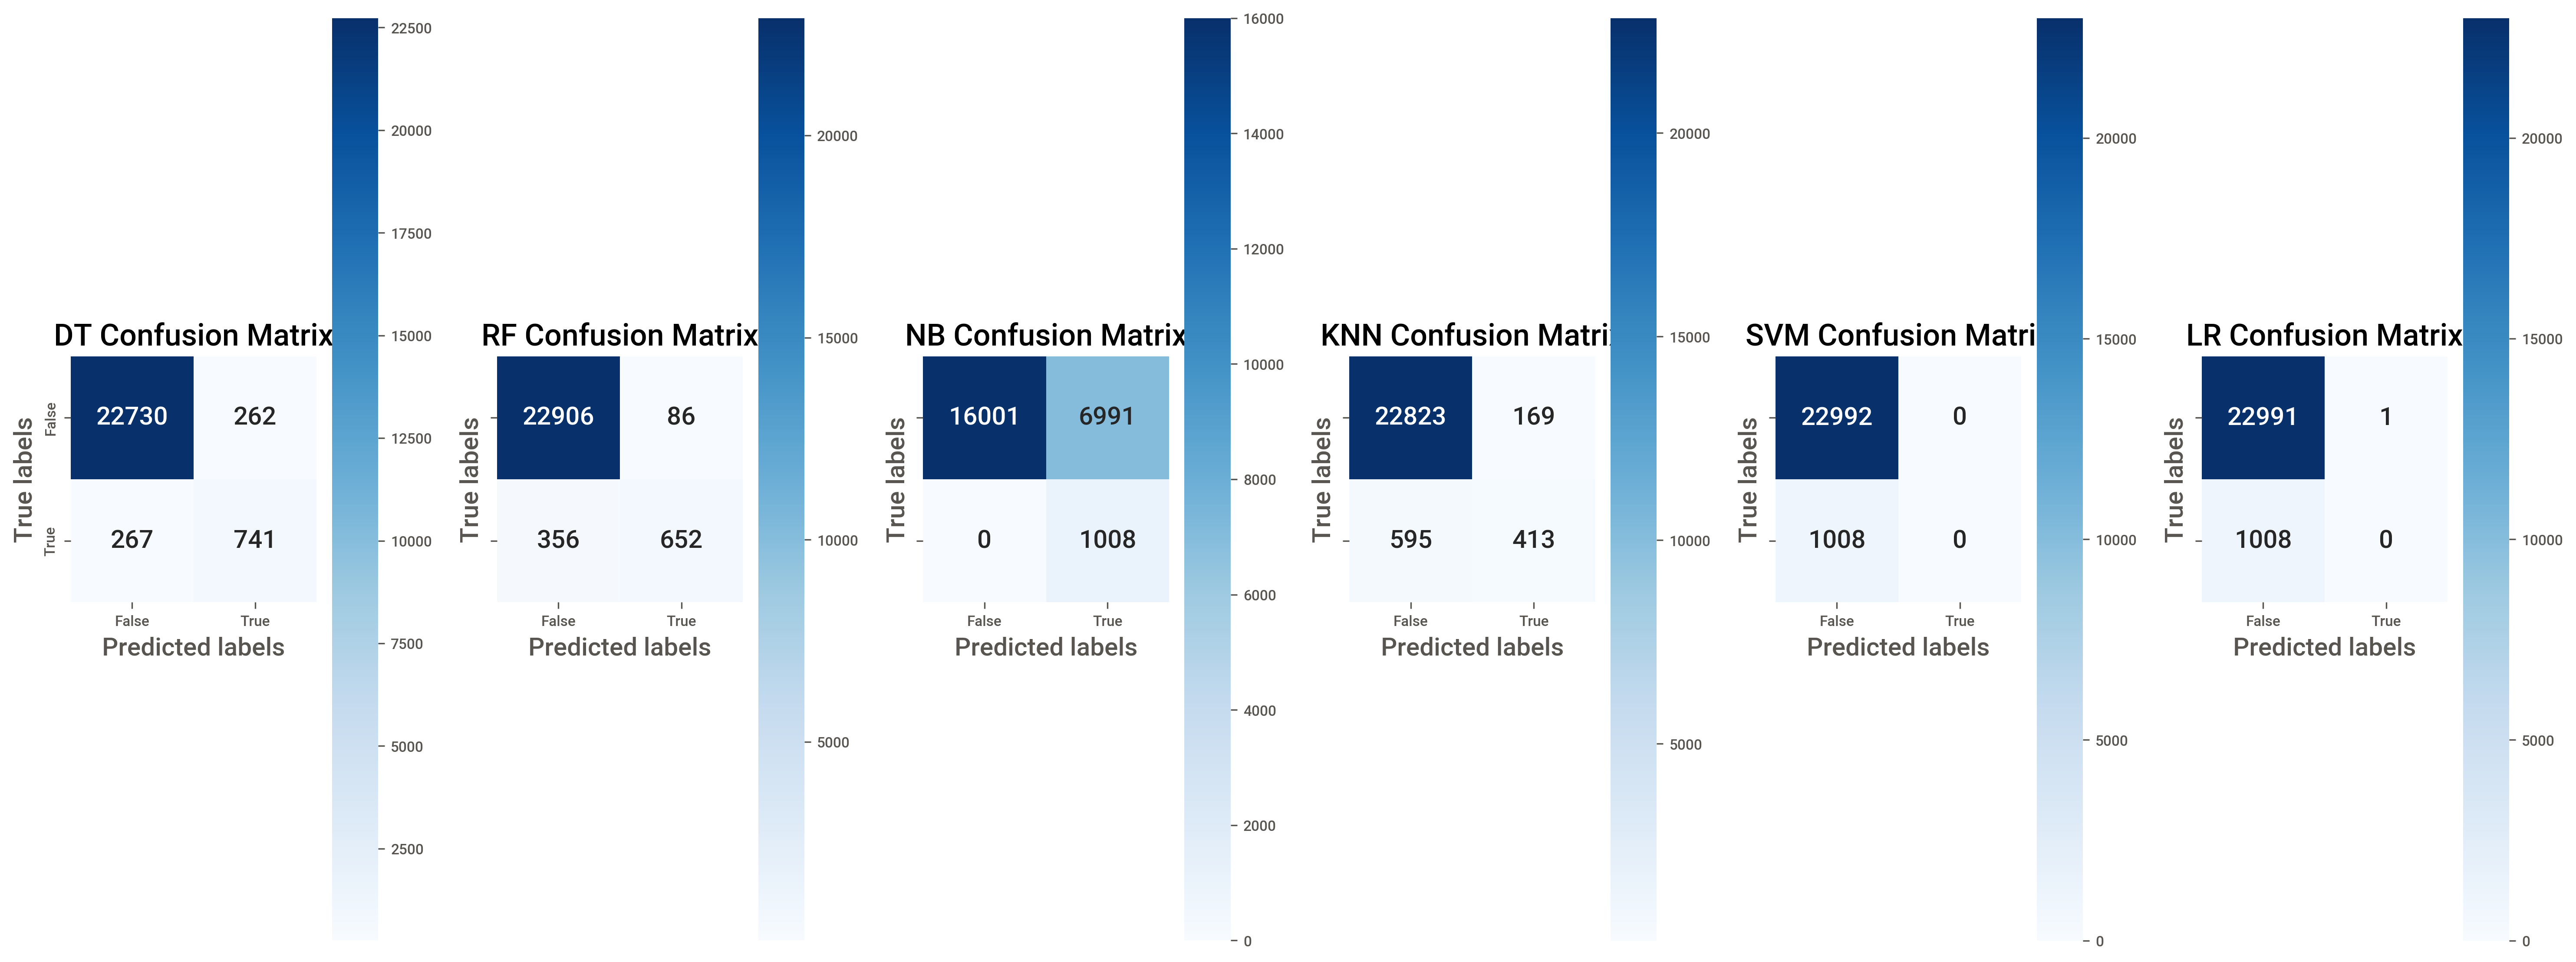

In [62]:
# Calling the funtion to plot the confusion Matrix
plot_confusion_matrices(classifiers, classifier_labels, X_train_fs, y_train_fs, X_test_fs, y_test_fs)

# BUILDING SECOND SETS OF MODEL -BALANCE DATASET
##  Balancing the Data Set ( Using Random UnderSampling)

# Using all the Features and Balance Dataset (Model_2a)

In [63]:
# Preprocessing the dataset by creating X and Y variables
X_b = panic_df_cleaned.drop(["Panic Disorder Diagnosis", "Participant ID"], axis=1)
y_b= panic_df_cleaned["Panic Disorder Diagnosis"]


# Performing ramdom under smapling

y_b.value_counts(normalize =True)
X_balanced, y_balanced = RandomUnderSampler().fit_resample(X_b, y_b)

# Checking the values of the balanced y_target variable
print(y_balanced.value_counts())

Panic Disorder Diagnosis
0    5126
1    5126
Name: count, dtype: int64


In [64]:
def preprocess_dataset():
    # Drop the target column and any other columns you want to exclude
    X_b = X_balanced

    # Extract the target variable
    y_b = y_balanced

    # Split the dataset into training and testing sets
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=42)

    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()

    # Fit and transform the scaler on the training features
    X_train_b = scaler.fit_transform(X_train_b)

    # Transform the testing features using the same scaler
    X_test_b = scaler.transform(X_test_b)

    return X_train_b, X_test_b, y_train_b, y_test_b

X_train_b, X_test_b, y_train_b, y_test_b = preprocess_dataset()

## Model_2a Performance Evaluation

In [65]:
# Call the classification function for each classifier
for classifier, label in zip(classifiers, classifier_labels):
    perform_classification(classifier, label, X_train_b, y_train_b, X_test_b, y_test_b)

Accuracy for DT: 0.9883
Accuracy for RF: 0.9829
Accuracy for NB: 0.8532
Accuracy for KNN: 0.8493
Accuracy for SVM: 0.8532
Accuracy for LR: 0.8693


In [66]:
model_performance()

,DT,RF,NB,KNN,SVM,LR
Accuracy,0.988298,0.982935,0.853242,0.849342,0.853242,0.869332
F1-score,0.988119,0.982985,0.870426,0.865124,0.870426,0.878292
Specificity,0.989098,0.966539,0.770579,0.774219,0.770579,0.811923
Sensitivity,0.987141,1.000000,1.000000,0.980218,1.000000,0.956479
AUC,0.988282,0.983173,0.855288,0.851166,0.855288,0.870547
TN,1029.000000,1005.000000,739.000000,751.000000,739.000000,816.000000
FP,11.000000,35.000000,301.000000,289.000000,301.000000,224.000000
FN,13.000000,0.000000,0.000000,20.000000,0.000000,44.000000
TP,998.000000,1011.000000,1011.000000,991.000000,1011.000000,967.000000


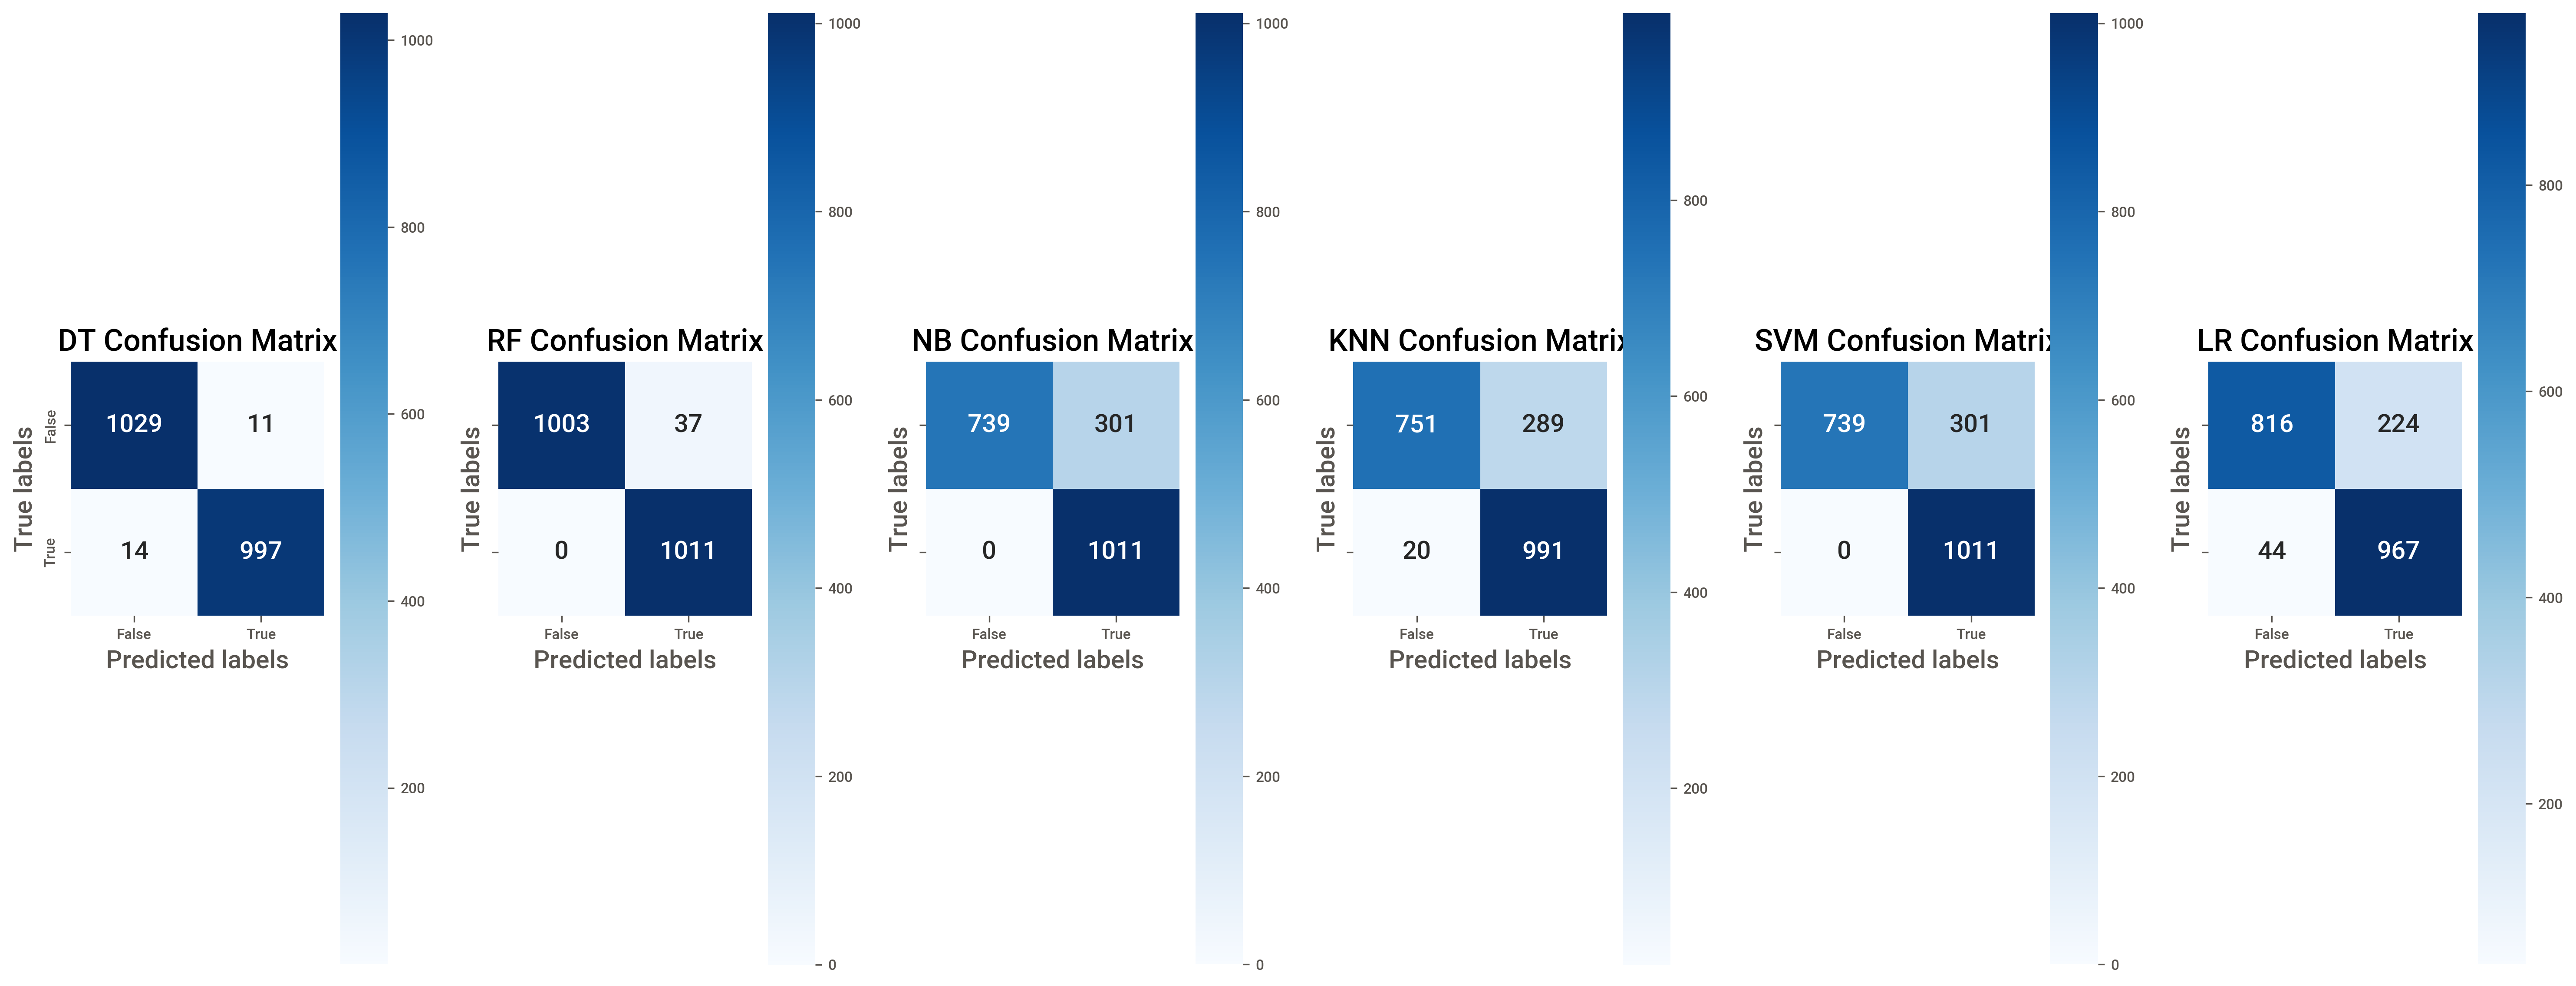

In [67]:
# Calling the funtion to plot the confusion Matrix
plot_confusion_matrices(classifiers, classifier_labels, X_train_b, y_train_b, X_test_b, y_test_b)

## Building Moldel_2b - With Balance Dataset and Applying 12 Best Features (Moldel_2b)
Family History, Personal History, Symptoms, Current Stressors,	Impact on Lif, 	Demographics, Medical History, Psychiatric History, Substance Use, Coping Mechanisms, Social Support and Lifestyle Factors

In [68]:
def preprocess_dataset():
    # Drop the target column and other columns you want to exclude
    X_bfs = panic_df_cleaned.drop(["Panic Disorder Diagnosis", "Participant ID", "Age", "Gender", "Severity"], axis=1)

    # Extract the target variable
    y_bfs = panic_df_cleaned["Panic Disorder Diagnosis"].values

    # Apply Random Under-Sampling
    balance_df = RandomUnderSampler(random_state=42)
    
    X_balanced_fs, y_balanced_fs = balance_df.fit_resample(X_bfs, y_bfs)
    
    # Split the dataset into training and testing sets
    X_train_bfs, X_test_bfs, y_train_bfs, y_test_bfs = train_test_split(X_balanced_fs, y_balanced_fs, test_size=0.2, random_state=42)

    # Initialize the Min-Max Scaler
    scaler = MinMaxScaler()

    # Fit and transform the scaler on the training features
    X_train_bfs = scaler.fit_transform(X_train_bfs)

    # Transform the testing features using the same scaler
    X_test_bfs = scaler.transform(X_test_bfs)

    return X_train_bfs, X_test_bfs, y_train_bfs, y_test_bfs

# Use the function to preprocess the dataset
X_train_bfs, X_test_bfs, y_train_bfs, y_test_bfs = preprocess_dataset()

## Model_2b Performance Evaluation

In [69]:
# Call the classification function for each classifier
for classifier, label in zip(classifiers, classifier_labels):
    perform_classification(classifier, label, X_train_bfs, y_train_bfs, X_test_bfs, y_test_bfs)

Accuracy for DT: 0.9581
Accuracy for RF: 0.9639
Accuracy for NB: 0.8459
Accuracy for KNN: 0.8864
Accuracy for SVM: 0.9000
Accuracy for LR: 0.8903


In [70]:
# Calling the funtion to print perforncance
model_performance()

,DT,RF,NB,KNN,SVM,LR
Accuracy,0.958069,0.963920,0.845929,0.886397,0.900049,0.890297
F1-score,0.957384,0.964593,0.864842,0.894998,0.907948,0.899866
Specificity,0.959285,0.934198,0.761869,0.822020,0.831414,0.817961
Sensitivity,0.955490,0.997033,1.000000,0.982196,1.000000,1.000000
AUC,0.958033,0.964382,0.848077,0.887733,0.901442,0.891827
TN,999.000000,969.000000,724.000000,825.000000,835.000000,815.000000
FP,41.000000,71.000000,316.000000,215.000000,205.000000,225.000000
FN,45.000000,3.000000,0.000000,18.000000,0.000000,0.000000
TP,966.000000,1008.000000,1011.000000,993.000000,1011.000000,1011.000000


## Confusion Matrix for First Sets of Model_2b

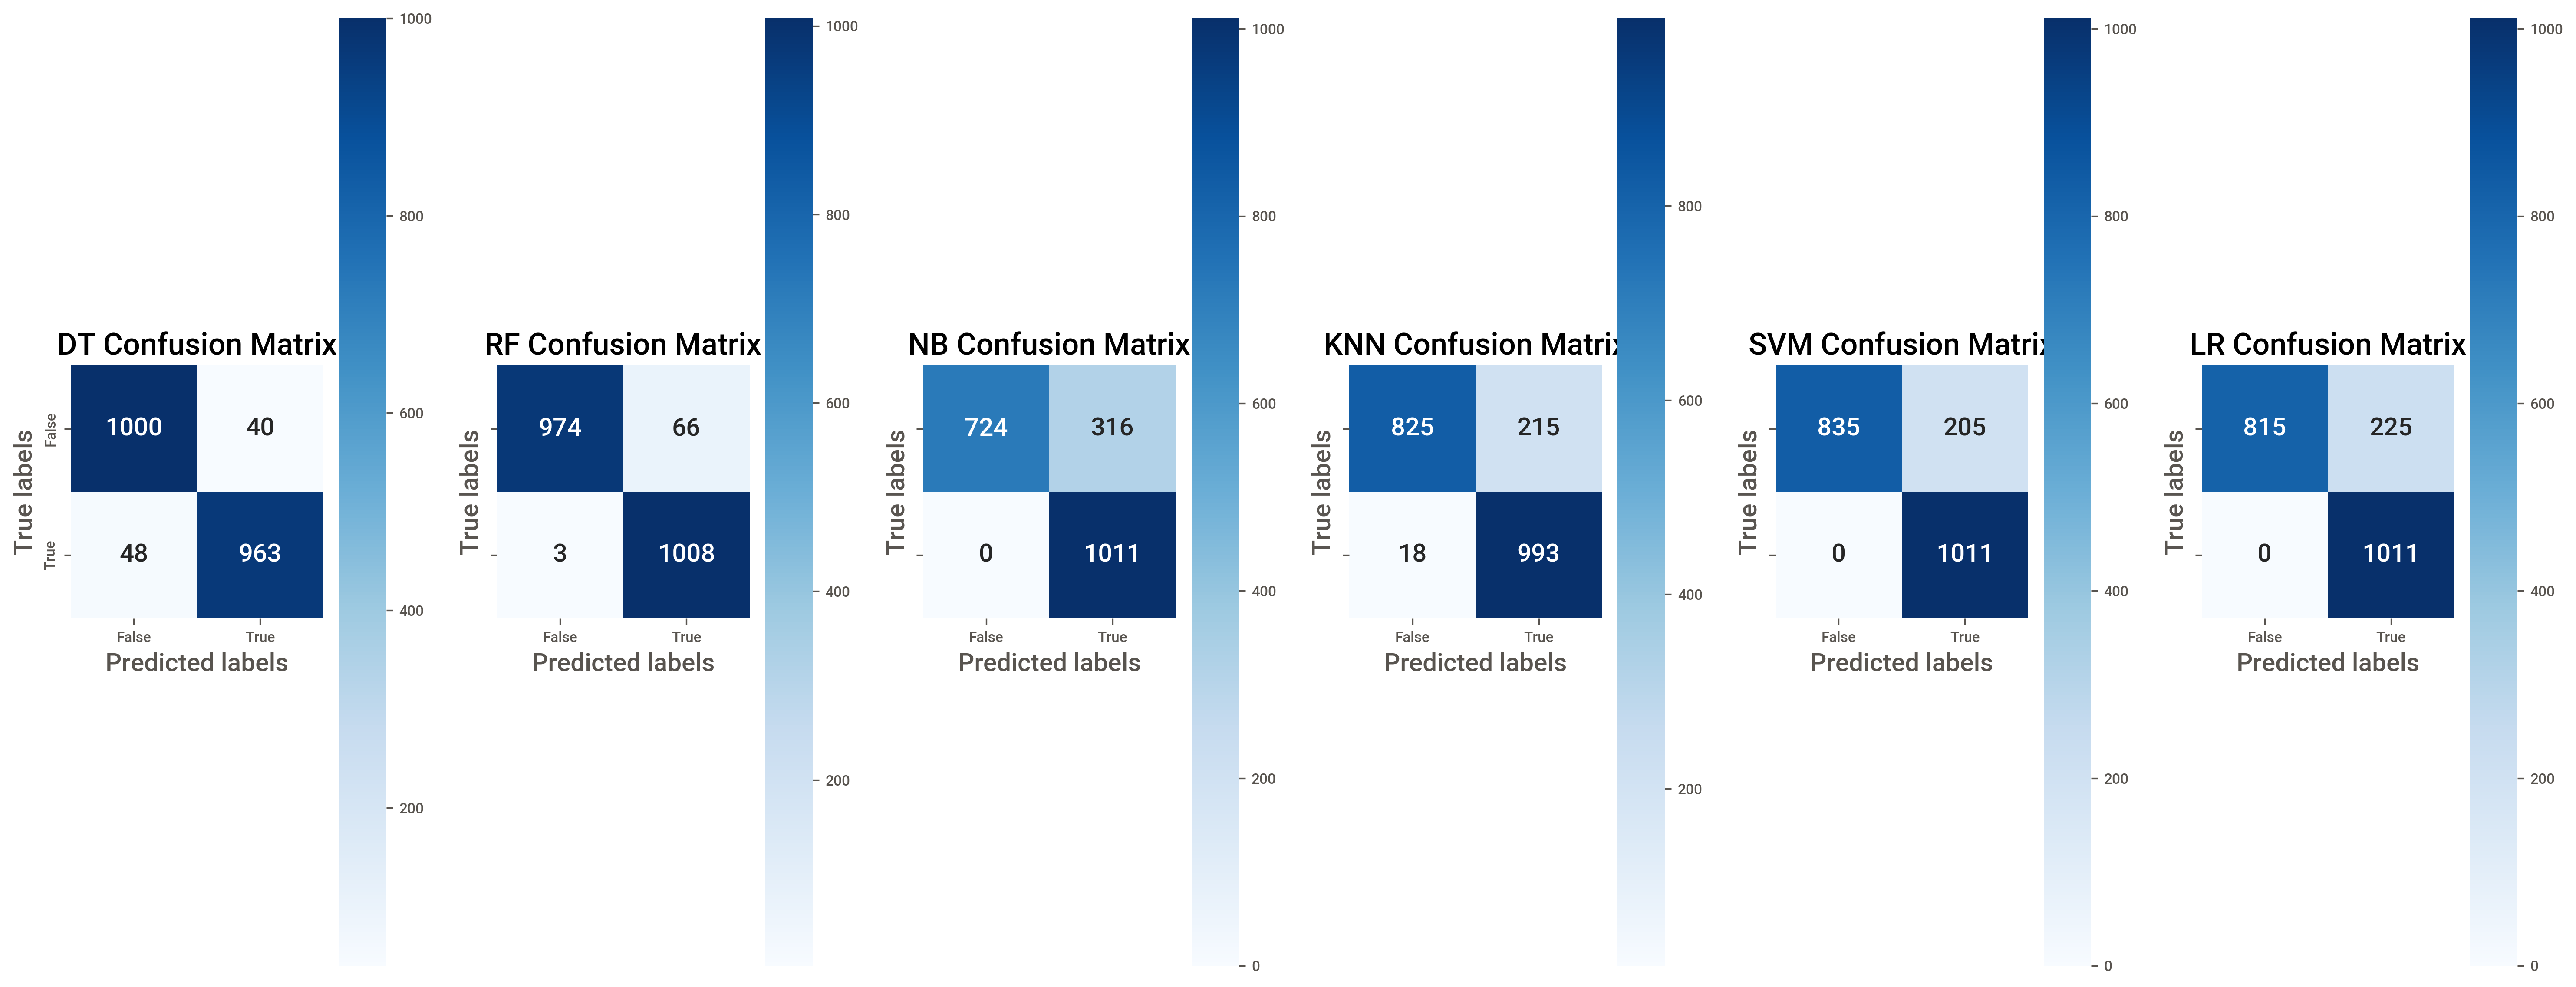

In [71]:
# Calling the funtion to plot the confusion Matrix
plot_confusion_matrices(classifiers, classifier_labels, X_train_bfs, y_train_bfs, X_test_bfs, y_test_bfs)

# BUILDING THIRD SET OF MODEL (Applying Esemble Method for the Third Model)

## Model_3: Model Stacking
Combining the all the Six algothrims (Decision Tree, Random Forest, Support Vector Machine, K-Nearest Neighbours, Gaussian Classifier and Logistics Regressor)  used to Build on Model

In [73]:
# Define the evaluation function with modifications to capture results
def evaluate_stacking(X, y):
    def get_stacking():
        level0 = [
            ("dtree", DecisionTreeClassifier()),
            ("knn", KNeighborsClassifier()),
            ("bayes", GaussianNB()),
            ("rfc", RandomForestClassifier()),
            ("svm", SVC(probability=True))  # SVM needs probability=True to be part of stacking
        ]
        level1 = LogisticRegression()
        model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        return model

    def evaluate_model(model, X, y):
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=24)
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
        return scores

    def get_models():
        models = {
            
            'stacking': get_stacking()
        }
        return models

    models = get_models()

    names = []
    results = []
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print(f"{name}: {mean(scores):.2f} ({std(scores):.4f})")

    return names, results

# Apply the evaluation function
evaluation_results = evaluate_stacking(X_train_bfs, y_train_bfs)

stacking: 0.97 (0.0056)


## Model_3 Evaluation (Esemble)

In [74]:
def train_and_evaluate_DT(X_train, X_test, y_train, y_test, plot_title):
    # Ignore underflow errors in numpy (temporary fix)
    np.seterr(under='ignore')

    # Define the base estimators for stacking
    level0 = [
        ("dtree", make_pipeline(StandardScaler(), DecisionTreeClassifier())),
        ("knn", make_pipeline(StandardScaler(), KNeighborsClassifier())),
        ("bayes", make_pipeline(StandardScaler(), GaussianNB())),
        ("rfc", make_pipeline(StandardScaler(), RandomForestClassifier())),
        ("svm", make_pipeline(StandardScaler(), SVC(probability=True)))  # SVM needs probability=True to be part of stacking
    ]
    
    # Define the final estimator for stacking
    level1 = LogisticRegression()

    # Initialize the Stacking Classifier
    stk = StackingClassifier(estimators=level0, final_estimator=level1)

    # Training using the Stacking Classifier
    stk.fit(X_train, y_train)

    # Making predictions using the Stacking Classifier
    stk_pred = stk.predict(X_test)

    # Calculate accuracy of the classification
    accuracy = accuracy_score(y_test, stk_pred)
    print(f"Accuracy is {accuracy}")

    # Calculate balanced accuracy of the classification
    balanced_accuracy = balanced_accuracy_score(y_test, stk_pred)
    print(f"Balanced_accuracy is {balanced_accuracy}")

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, stk_pred))

    # Print confusion matrix
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, stk_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - " + plot_title)  # Add the title to the plot title
    plt.savefig(f"{plot_title.replace(' ', '_')}_Confusion_Matrix.png")
    plt.show()


Accuracy is 0.9717211116528522
Balanced_accuracy is 0.9719636878946969
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1040
           1       0.96      0.99      0.97      1011

    accuracy                           0.97      2051
   macro avg       0.97      0.97      0.97      2051
weighted avg       0.97      0.97      0.97      2051

Confusion Matrix:


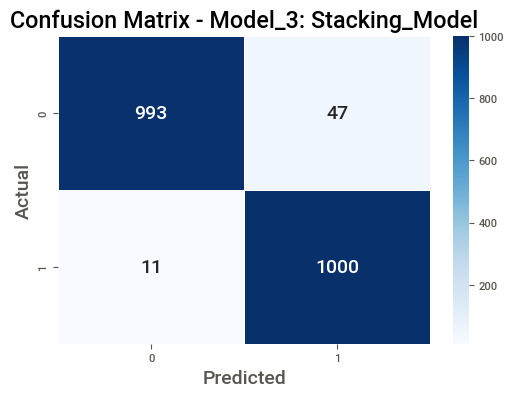

In [75]:
# Run the function with the preprocessed data
train_and_evaluate_DT(X_train_bfs, X_test_bfs, y_train_bfs, y_test_bfs, "Model_3: Stacking_Model")

# ROC and AUC

In [76]:
def train_and_evaluate_DT(X_train, X_test, y_train, y_test, plot_title):
    np.seterr(under='ignore')

    # Define the base estimators for stacking
    level0 = [
        ("dtree", make_pipeline(StandardScaler(), DecisionTreeClassifier())),
        ("knn", make_pipeline(StandardScaler(), KNeighborsClassifier())),
        ("bayes", make_pipeline(StandardScaler(), GaussianNB())),
        ("rfc", make_pipeline(StandardScaler(), RandomForestClassifier())),
        ("svm", make_pipeline(StandardScaler(), SVC(probability=True)))
    ]
    
    # Define the final estimator for stacking
    level1 = LogisticRegression()

    # Initialize the Stacking Classifier
    stk = StackingClassifier(estimators=level0, final_estimator=level1)

    # Training using the Stacking Classifier
    stk.fit(X_train, y_train)

    # Making predictions using the Stacking Classifier
    stk_pred = stk.predict(X_test)

    # Calculate accuracy of the classification
    accuracy = accuracy_score(y_test, stk_pred)
    print(f"Accuracy is {accuracy}")

    # Calculate balanced accuracy of the classification
    balanced_accuracy = balanced_accuracy_score(y_test, stk_pred)
    print(f"Balanced_accuracy is {balanced_accuracy}")

    # Print classification report
    print('Classification Report:')
    print(classification_report(y_test, stk_pred))

    # Print confusion matrix
    print('Confusion Matrix:')
    cm = confusion_matrix(y_test, stk_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix - " + plot_title)
    plt.savefig(f"{plot_title.replace(' ', '_')}_Confusion_Matrix.png")
    plt.show()

    # Compute the probabilities for ROC curve
    probas = stk.predict_proba(X_test)[:, 1]

    # Compute ROC curve and ROC area
    fpr, tpr, thresholds = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    
    # Display the AUC
    print(f"AUC: {roc_auc:.2f}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - ' + plot_title)
    plt.legend(loc="lower right")
    plt.show()


Accuracy is 0.9717211116528522
Balanced_accuracy is 0.97199126911664
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1040
           1       0.95      0.99      0.97      1011

    accuracy                           0.97      2051
   macro avg       0.97      0.97      0.97      2051
weighted avg       0.97      0.97      0.97      2051

Confusion Matrix:


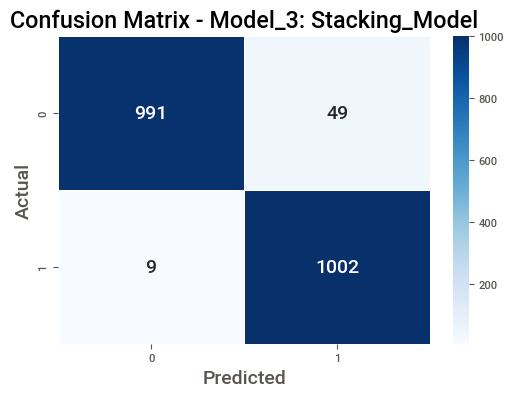

AUC: 0.99


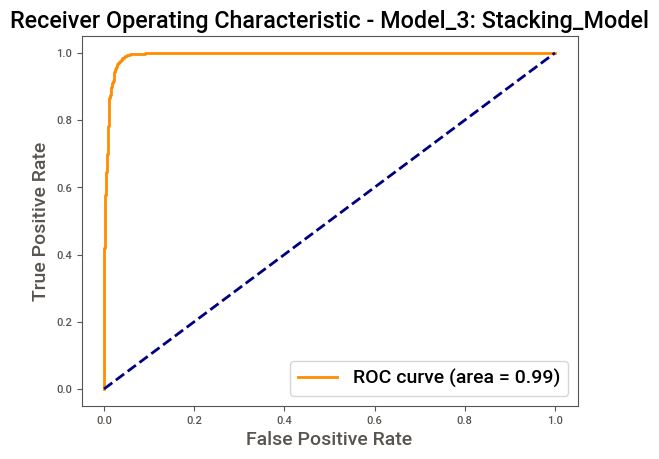

In [77]:
train_and_evaluate_DT(X_train_bfs, X_test_bfs, y_train_bfs, y_test_bfs, "Model_3: Stacking_Model")

# APPLYING MODEL EXPLAINABILITY OF THE THIRD MODEL (ESENBLE MODEL) 

In [78]:
def stacking_explainability():
    level0 = [
        ("dtree", DecisionTreeClassifier()),
        ("knn", KNeighborsClassifier()),
        ("bayes", GaussianNB()),
        ("rfc", RandomForestClassifier()),
        ("svm", SVC(probability=True))  # SVM needs probability=True to be part of stacking
    ]
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [79]:
# Train the Stacking Classifier
stacking_model = stacking_explainability()
stacking_model.fit(X_train_bfs, y_train_bfs)

# Create a SHAP KernelExplainer
explainer = shap.KernelExplainer(stacking_model.predict, shap.sample(X_train_bfs, 100))

# Calculate SHAP values for a subset of your training data
shap_values = explainer.shap_values(shap.sample(X_train_bfs, 100))


  0%|          | 0/100 [00:00<?, ?it/s]

In [82]:
X_bfs = panic_df_cleaned.drop(["Panic Disorder Diagnosis", "Participant ID", "Age", "Gender", "Severity"], axis=1)

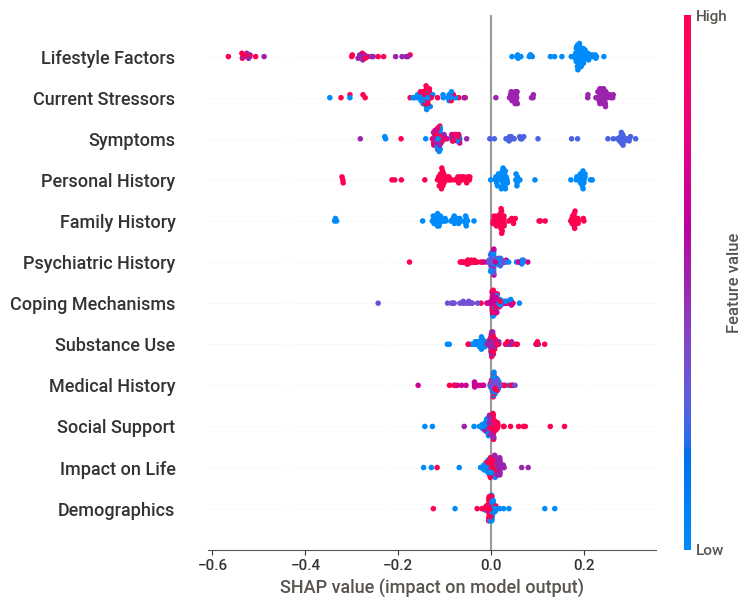

In [83]:
# Plot summary plot
shap.summary_plot(shap_values, shap.sample(X_train_bfs, 100),feature_names=X_bfs.columns)

##############################################################################